# exp2
___
実験2:生データの座標推定の精度(最も簡単な1×1の欠陥を利用)

In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_position_raw_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_position_raw_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_position_raw_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_position_raw_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_raw_data.csv'

### 入力データと正解データ
no_hole_data = []
x_data = []
y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    x_data.append(data_array[1:-1])
    y_data.append(data_array[0])
# with open(four_holes_path) as fp2:
#   for line in fp2:
#     data_array = line.split(',')
#     x_data.append(data_array[1:-1])
#     y_data.append(data_array[0])
# with open(nine_holes_path) as fp3:
#   for line in fp3:
#     data_array = line.split(',')
#     x_data.append(data_array[1:-1])
#     y_data.append(data_array[0])
# with open(sixteen_holes_path) as fp4:
#   for line in fp4:
#     data_array = line.split(',')
#     x_data.append(data_array[1:-1])
#     y_data.append(data_array[0])
# with open(twentyfive_holes_path) as fp5:
#   for line in fp5:
#     data_array = line.split(',')
#     x_data.append(data_array[1:-1])
#     y_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
x_data = np.array(x_data, dtype=float)
y_data = np.array(y_data, dtype=int)

### データの加工
x_data = (x_data-no_hole_data)
y_data = keras.utils.to_categorical(y_data, 2209)

### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

### reshape
x_train = x_train.reshape(1767, 50, 1)
x_test = x_test.reshape(442, 50, 1)

In [3]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(2209, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [4]:
# 学習(位置)
epochs = 1000
batch_size = 128
position_history = position_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 1767 samples, validate on 442 samples
Epoch 1/1000
1767/1767 [==============================] - 1s 416us/step - loss: 8.1155 - accuracy: 0.0000e+00 - val_loss: 8.6761 - val_accuracy: 0.0000e+00
Epoch 2/1000
1767/1767 [==============================] - 1s 363us/step - loss: 7.6764 - accuracy: 5.6593e-04 - val_loss: 9.4096 - val_accuracy: 0.0000e+00
Epoch 3/1000
1767/1767 [==============================] - 1s 314us/step - loss: 7.5858 - accuracy: 0.0000e+00 - val_loss: 9.8438 - val_accuracy: 0.0000e+00
Epoch 4/1000
1767/1767 [==============================] - 1s 323us/step - loss: 7.5595 - accuracy: 0.0000e+00 - val_loss: 10.1590 - val_accuracy: 0.0000e+00
Epoch 5/1000
1767/1767 [==============================] - 1s 291us/step - loss: 7.5515 - accuracy: 0.0000e+00 - val_loss: 10.3980 - val_accuracy: 0.0000e+00
Epoch 6/1000
1767/1767 [==============================] - 1s 300us/step - loss: 7.5455 - accuracy: 0.0000e+00 - val_loss: 10.5679 - val_accuracy: 0.0000e+00
Epoch 7/1000
1

1767/1767 [==============================] - 1s 286us/step - loss: 7.4886 - accuracy: 0.0040 - val_loss: 12.1919 - val_accuracy: 0.0000e+00
Epoch 54/1000
1767/1767 [==============================] - 0s 277us/step - loss: 7.4881 - accuracy: 0.0034 - val_loss: 12.2547 - val_accuracy: 0.0000e+00
Epoch 55/1000
1767/1767 [==============================] - 0s 272us/step - loss: 7.4878 - accuracy: 0.0034 - val_loss: 12.2398 - val_accuracy: 0.0000e+00
Epoch 56/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.4872 - accuracy: 0.0040 - val_loss: 12.3208 - val_accuracy: 0.0000e+00
Epoch 57/1000
1767/1767 [==============================] - 0s 276us/step - loss: 7.4867 - accuracy: 0.0051 - val_loss: 12.3433 - val_accuracy: 0.0000e+00
Epoch 58/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.4863 - accuracy: 0.0034 - val_loss: 12.3529 - val_accuracy: 0.0000e+00
Epoch 59/1000
1767/1767 [==============================] - 0s 279us/step - loss: 7.4864 - 

1767/1767 [==============================] - 0s 272us/step - loss: 7.4662 - accuracy: 0.0079 - val_loss: 14.5773 - val_accuracy: 0.0000e+00
Epoch 107/1000
1767/1767 [==============================] - 1s 293us/step - loss: 7.4658 - accuracy: 0.0062 - val_loss: 14.5831 - val_accuracy: 0.0000e+00
Epoch 108/1000
1767/1767 [==============================] - 0s 276us/step - loss: 7.4652 - accuracy: 0.0062 - val_loss: 14.6407 - val_accuracy: 0.0000e+00
Epoch 109/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.4648 - accuracy: 0.0057 - val_loss: 14.7231 - val_accuracy: 0.0000e+00
Epoch 110/1000
1767/1767 [==============================] - 0s 276us/step - loss: 7.4636 - accuracy: 0.0068 - val_loss: 14.7323 - val_accuracy: 0.0000e+00
Epoch 111/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.4641 - accuracy: 0.0057 - val_loss: 14.8826 - val_accuracy: 0.0000e+00
Epoch 112/1000
1767/1767 [==============================] - 0s 277us/step - loss: 7.4

Epoch 159/1000
1767/1767 [==============================] - 0s 268us/step - loss: 7.4421 - accuracy: 0.0108 - val_loss: 17.1720 - val_accuracy: 0.0000e+00
Epoch 160/1000
1767/1767 [==============================] - 0s 282us/step - loss: 7.4414 - accuracy: 0.0108 - val_loss: 17.2478 - val_accuracy: 0.0000e+00
Epoch 161/1000
1767/1767 [==============================] - 1s 336us/step - loss: 7.4411 - accuracy: 0.0102 - val_loss: 17.2955 - val_accuracy: 0.0000e+00
Epoch 162/1000
1767/1767 [==============================] - 1s 303us/step - loss: 7.4403 - accuracy: 0.0119 - val_loss: 17.3545 - val_accuracy: 0.0000e+00
Epoch 163/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.4398 - accuracy: 0.0125 - val_loss: 17.3849 - val_accuracy: 0.0000e+00
Epoch 164/1000
1767/1767 [==============================] - 0s 278us/step - loss: 7.4410 - accuracy: 0.0119 - val_loss: 17.4313 - val_accuracy: 0.0000e+00
Epoch 165/1000
1767/1767 [==============================] - 1s 286us/s

Epoch 212/1000
1767/1767 [==============================] - 0s 277us/step - loss: 7.4149 - accuracy: 0.0130 - val_loss: 19.7183 - val_accuracy: 0.0000e+00
Epoch 213/1000
1767/1767 [==============================] - 0s 278us/step - loss: 7.4131 - accuracy: 0.0130 - val_loss: 19.7907 - val_accuracy: 0.0000e+00
Epoch 214/1000
1767/1767 [==============================] - 0s 278us/step - loss: 7.4133 - accuracy: 0.0158 - val_loss: 19.9234 - val_accuracy: 0.0000e+00
Epoch 215/1000
1767/1767 [==============================] - 0s 270us/step - loss: 7.4138 - accuracy: 0.0147 - val_loss: 19.9075 - val_accuracy: 0.0000e+00
Epoch 216/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.4116 - accuracy: 0.0125 - val_loss: 19.9144 - val_accuracy: 0.0000e+00
Epoch 217/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.4109 - accuracy: 0.0130 - val_loss: 19.9504 - val_accuracy: 0.0000e+00
Epoch 218/1000
1767/1767 [==============================] - 0s 272us/s

Epoch 265/1000
1767/1767 [==============================] - 0s 278us/step - loss: 7.3844 - accuracy: 0.0158 - val_loss: 21.8735 - val_accuracy: 0.0000e+00
Epoch 266/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.3847 - accuracy: 0.0164 - val_loss: 21.8445 - val_accuracy: 0.0000e+00
Epoch 267/1000
1767/1767 [==============================] - 0s 270us/step - loss: 7.3823 - accuracy: 0.0158 - val_loss: 21.9513 - val_accuracy: 0.0000e+00
Epoch 268/1000
1767/1767 [==============================] - 0s 270us/step - loss: 7.3824 - accuracy: 0.0164 - val_loss: 21.9271 - val_accuracy: 0.0000e+00
Epoch 269/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.3816 - accuracy: 0.0153 - val_loss: 22.0357 - val_accuracy: 0.0000e+00
Epoch 270/1000
1767/1767 [==============================] - 0s 271us/step - loss: 7.3830 - accuracy: 0.0130 - val_loss: 22.0378 - val_accuracy: 0.0000e+00
Epoch 271/1000
1767/1767 [==============================] - 0s 282us/s

Epoch 318/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.3545 - accuracy: 0.0164 - val_loss: 23.5947 - val_accuracy: 0.0000e+00
Epoch 319/1000
1767/1767 [==============================] - 0s 273us/step - loss: 7.3547 - accuracy: 0.0181 - val_loss: 23.6255 - val_accuracy: 0.0000e+00
Epoch 320/1000
1767/1767 [==============================] - 0s 272us/step - loss: 7.3537 - accuracy: 0.0175 - val_loss: 23.6399 - val_accuracy: 0.0000e+00
Epoch 321/1000
1767/1767 [==============================] - 0s 276us/step - loss: 7.3528 - accuracy: 0.0170 - val_loss: 23.7285 - val_accuracy: 0.0000e+00
Epoch 322/1000
1767/1767 [==============================] - 1s 327us/step - loss: 7.3554 - accuracy: 0.0187 - val_loss: 23.7586 - val_accuracy: 0.0000e+00
Epoch 323/1000
1767/1767 [==============================] - 1s 295us/step - loss: 7.3521 - accuracy: 0.0187 - val_loss: 23.7583 - val_accuracy: 0.0000e+00
Epoch 324/1000
1767/1767 [==============================] - 0s 280us/s

Epoch 371/1000
1767/1767 [==============================] - 0s 278us/step - loss: 7.3259 - accuracy: 0.0209 - val_loss: 25.0925 - val_accuracy: 0.0000e+00
Epoch 372/1000
1767/1767 [==============================] - 0s 278us/step - loss: 7.3269 - accuracy: 0.0215 - val_loss: 25.2271 - val_accuracy: 0.0000e+00
Epoch 373/1000
1767/1767 [==============================] - 0s 277us/step - loss: 7.3277 - accuracy: 0.0221 - val_loss: 25.1552 - val_accuracy: 0.0000e+00
Epoch 374/1000
1767/1767 [==============================] - 0s 276us/step - loss: 7.3262 - accuracy: 0.0215 - val_loss: 25.1916 - val_accuracy: 0.0000e+00
Epoch 375/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.3239 - accuracy: 0.0215 - val_loss: 25.2404 - val_accuracy: 0.0000e+00
Epoch 376/1000
1767/1767 [==============================] - 0s 274us/step - loss: 7.3239 - accuracy: 0.0226 - val_loss: 25.2036 - val_accuracy: 0.0000e+00
Epoch 377/1000
1767/1767 [==============================] - 0s 277us/s

Epoch 424/1000
1767/1767 [==============================] - 0s 273us/step - loss: 7.2992 - accuracy: 0.0238 - val_loss: 26.4224 - val_accuracy: 0.0000e+00
Epoch 425/1000
1767/1767 [==============================] - 0s 272us/step - loss: 7.2978 - accuracy: 0.0243 - val_loss: 26.4183 - val_accuracy: 0.0000e+00
Epoch 426/1000
1767/1767 [==============================] - 0s 274us/step - loss: 7.2989 - accuracy: 0.0255 - val_loss: 26.4264 - val_accuracy: 0.0000e+00
Epoch 427/1000
1767/1767 [==============================] - 0s 269us/step - loss: 7.2970 - accuracy: 0.0243 - val_loss: 26.4875 - val_accuracy: 0.0000e+00
Epoch 428/1000
1767/1767 [==============================] - 0s 265us/step - loss: 7.2959 - accuracy: 0.0238 - val_loss: 26.4239 - val_accuracy: 0.0000e+00
Epoch 429/1000
1767/1767 [==============================] - 0s 273us/step - loss: 7.2973 - accuracy: 0.0255 - val_loss: 26.4782 - val_accuracy: 0.0000e+00
Epoch 430/1000
1767/1767 [==============================] - 0s 271us/s

Epoch 477/1000
1767/1767 [==============================] - 1s 347us/step - loss: 7.2727 - accuracy: 0.0260 - val_loss: 27.4889 - val_accuracy: 0.0000e+00
Epoch 478/1000
1767/1767 [==============================] - 1s 339us/step - loss: 7.2726 - accuracy: 0.0272 - val_loss: 27.5110 - val_accuracy: 0.0000e+00
Epoch 479/1000
1767/1767 [==============================] - 1s 337us/step - loss: 7.2728 - accuracy: 0.0300 - val_loss: 27.5164 - val_accuracy: 0.0000e+00
Epoch 480/1000
1767/1767 [==============================] - 1s 338us/step - loss: 7.2711 - accuracy: 0.0272 - val_loss: 27.5211 - val_accuracy: 0.0000e+00
Epoch 481/1000
1767/1767 [==============================] - 1s 326us/step - loss: 7.2733 - accuracy: 0.0277 - val_loss: 27.5178 - val_accuracy: 0.0000e+00
Epoch 482/1000
1767/1767 [==============================] - 1s 334us/step - loss: 7.2702 - accuracy: 0.0266 - val_loss: 27.6055 - val_accuracy: 0.0000e+00
Epoch 483/1000
1767/1767 [==============================] - 1s 334us/s

Epoch 530/1000
1767/1767 [==============================] - 1s 307us/step - loss: 7.2480 - accuracy: 0.0283 - val_loss: 28.5495 - val_accuracy: 0.0000e+00
Epoch 531/1000
1767/1767 [==============================] - 1s 301us/step - loss: 7.2452 - accuracy: 0.0277 - val_loss: 28.5641 - val_accuracy: 0.0000e+00
Epoch 532/1000
1767/1767 [==============================] - 1s 297us/step - loss: 7.2457 - accuracy: 0.0289 - val_loss: 28.6136 - val_accuracy: 0.0000e+00
Epoch 533/1000
1767/1767 [==============================] - 1s 302us/step - loss: 7.2489 - accuracy: 0.0272 - val_loss: 28.6594 - val_accuracy: 0.0000e+00
Epoch 534/1000
1767/1767 [==============================] - 1s 301us/step - loss: 7.2456 - accuracy: 0.0289 - val_loss: 28.6184 - val_accuracy: 0.0000e+00
Epoch 535/1000
1767/1767 [==============================] - 1s 296us/step - loss: 7.2429 - accuracy: 0.0294 - val_loss: 28.5843 - val_accuracy: 0.0000e+00
Epoch 536/1000
1767/1767 [==============================] - 1s 296us/s

Epoch 583/1000
1767/1767 [==============================] - 1s 305us/step - loss: 7.2207 - accuracy: 0.0300 - val_loss: 29.4219 - val_accuracy: 0.0000e+00
Epoch 584/1000
1767/1767 [==============================] - 1s 285us/step - loss: 7.2195 - accuracy: 0.0300 - val_loss: 29.4360 - val_accuracy: 0.0000e+00
Epoch 585/1000
1767/1767 [==============================] - 1s 289us/step - loss: 7.2195 - accuracy: 0.0311 - val_loss: 29.4484 - val_accuracy: 0.0000e+00
Epoch 586/1000
1767/1767 [==============================] - 1s 294us/step - loss: 7.2168 - accuracy: 0.0300 - val_loss: 29.4928 - val_accuracy: 0.0000e+00
Epoch 587/1000
1767/1767 [==============================] - 1s 294us/step - loss: 7.2185 - accuracy: 0.0300 - val_loss: 29.5520 - val_accuracy: 0.0000e+00
Epoch 588/1000
1767/1767 [==============================] - 1s 297us/step - loss: 7.2170 - accuracy: 0.0306 - val_loss: 29.5014 - val_accuracy: 0.0000e+00
Epoch 589/1000
1767/1767 [==============================] - 1s 299us/s

Epoch 636/1000
1767/1767 [==============================] - 1s 295us/step - loss: 7.1952 - accuracy: 0.0328 - val_loss: 30.1884 - val_accuracy: 0.0000e+00
Epoch 637/1000
1767/1767 [==============================] - 1s 293us/step - loss: 7.1959 - accuracy: 0.0306 - val_loss: 30.1986 - val_accuracy: 0.0000e+00
Epoch 638/1000
1767/1767 [==============================] - 1s 289us/step - loss: 7.1934 - accuracy: 0.0300 - val_loss: 30.2030 - val_accuracy: 0.0000e+00
Epoch 639/1000
1767/1767 [==============================] - 1s 287us/step - loss: 7.1954 - accuracy: 0.0328 - val_loss: 30.2380 - val_accuracy: 0.0000e+00
Epoch 640/1000
1767/1767 [==============================] - 1s 318us/step - loss: 7.1975 - accuracy: 0.0311 - val_loss: 30.2369 - val_accuracy: 0.0000e+00
Epoch 641/1000
1767/1767 [==============================] - 1s 347us/step - loss: 7.1956 - accuracy: 0.0323 - val_loss: 30.2977 - val_accuracy: 0.0000e+00
Epoch 642/1000
1767/1767 [==============================] - 1s 285us/s

1767/1767 [==============================] - 0s 282us/step - loss: 7.1719 - accuracy: 0.0334 - val_loss: 30.8544 - val_accuracy: 0.0000e+00
Epoch 689/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.1726 - accuracy: 0.0317 - val_loss: 30.9449 - val_accuracy: 0.0000e+00
Epoch 690/1000
1767/1767 [==============================] - 0s 277us/step - loss: 7.1732 - accuracy: 0.0334 - val_loss: 30.8895 - val_accuracy: 0.0000e+00
Epoch 691/1000
1767/1767 [==============================] - 0s 274us/step - loss: 7.1721 - accuracy: 0.0345 - val_loss: 30.9584 - val_accuracy: 0.0000e+00
Epoch 692/1000
1767/1767 [==============================] - 0s 272us/step - loss: 7.1736 - accuracy: 0.0362 - val_loss: 30.9701 - val_accuracy: 0.0000e+00
Epoch 693/1000
1767/1767 [==============================] - 1s 355us/step - loss: 7.1719 - accuracy: 0.0357 - val_loss: 30.9136 - val_accuracy: 0.0000e+00
Epoch 694/1000
1767/1767 [==============================] - 0s 263us/step - loss: 7.1

Epoch 741/1000
1767/1767 [==============================] - 0s 283us/step - loss: 7.1514 - accuracy: 0.0368 - val_loss: 31.5053 - val_accuracy: 0.0000e+00
Epoch 742/1000
1767/1767 [==============================] - 0s 282us/step - loss: 7.1498 - accuracy: 0.0345 - val_loss: 31.5496 - val_accuracy: 0.0000e+00
Epoch 743/1000
1767/1767 [==============================] - 0s 276us/step - loss: 7.1507 - accuracy: 0.0357 - val_loss: 31.4877 - val_accuracy: 0.0000e+00
Epoch 744/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.1469 - accuracy: 0.0351 - val_loss: 31.5600 - val_accuracy: 0.0000e+00
Epoch 745/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.1497 - accuracy: 0.0357 - val_loss: 31.5564 - val_accuracy: 0.0000e+00
Epoch 746/1000
1767/1767 [==============================] - 0s 279us/step - loss: 7.1488 - accuracy: 0.0368 - val_loss: 31.5372 - val_accuracy: 0.0000e+00
Epoch 747/1000
1767/1767 [==============================] - 1s 284us/s

Epoch 794/1000
1767/1767 [==============================] - 0s 274us/step - loss: 7.1285 - accuracy: 0.0362 - val_loss: 31.9598 - val_accuracy: 0.0000e+00
Epoch 795/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.1265 - accuracy: 0.0351 - val_loss: 31.9928 - val_accuracy: 0.0000e+00
Epoch 796/1000
1767/1767 [==============================] - 0s 278us/step - loss: 7.1266 - accuracy: 0.0379 - val_loss: 32.0184 - val_accuracy: 0.0000e+00
Epoch 797/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.1266 - accuracy: 0.0362 - val_loss: 32.0560 - val_accuracy: 0.0000e+00
Epoch 798/1000
1767/1767 [==============================] - 0s 274us/step - loss: 7.1258 - accuracy: 0.0351 - val_loss: 31.9958 - val_accuracy: 0.0000e+00
Epoch 799/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.1242 - accuracy: 0.0385 - val_loss: 32.0651 - val_accuracy: 0.0000e+00
Epoch 800/1000
1767/1767 [==============================] - 0s 279us/s

Epoch 847/1000
1767/1767 [==============================] - 0s 270us/step - loss: 7.1084 - accuracy: 0.0379 - val_loss: 32.3089 - val_accuracy: 0.0000e+00
Epoch 848/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.1096 - accuracy: 0.0390 - val_loss: 32.4692 - val_accuracy: 0.0000e+00
Epoch 849/1000
1767/1767 [==============================] - 0s 272us/step - loss: 7.1083 - accuracy: 0.0379 - val_loss: 32.3926 - val_accuracy: 0.0000e+00
Epoch 850/1000
1767/1767 [==============================] - 0s 279us/step - loss: 7.1063 - accuracy: 0.0390 - val_loss: 32.4289 - val_accuracy: 0.0000e+00
Epoch 851/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.1063 - accuracy: 0.0402 - val_loss: 32.4765 - val_accuracy: 0.0000e+00
Epoch 852/1000
1767/1767 [==============================] - 1s 285us/step - loss: 7.1003 - accuracy: 0.0379 - val_loss: 32.3727 - val_accuracy: 0.0000e+00
Epoch 853/1000
1767/1767 [==============================] - 1s 353us/s

Epoch 900/1000
1767/1767 [==============================] - 0s 282us/step - loss: 7.0858 - accuracy: 0.0419 - val_loss: 32.7628 - val_accuracy: 0.0000e+00
Epoch 901/1000
1767/1767 [==============================] - 0s 274us/step - loss: 7.0856 - accuracy: 0.0379 - val_loss: 32.7903 - val_accuracy: 0.0000e+00
Epoch 902/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.0857 - accuracy: 0.0407 - val_loss: 32.7401 - val_accuracy: 0.0000e+00
Epoch 903/1000
1767/1767 [==============================] - 0s 275us/step - loss: 7.0836 - accuracy: 0.0379 - val_loss: 32.8018 - val_accuracy: 0.0000e+00
Epoch 904/1000
1767/1767 [==============================] - 0s 276us/step - loss: 7.0837 - accuracy: 0.0407 - val_loss: 32.7631 - val_accuracy: 0.0000e+00
Epoch 905/1000
1767/1767 [==============================] - 0s 278us/step - loss: 7.0864 - accuracy: 0.0396 - val_loss: 32.8221 - val_accuracy: 0.0000e+00
Epoch 906/1000
1767/1767 [==============================] - 1s 284us/s

Epoch 953/1000
1767/1767 [==============================] - 1s 289us/step - loss: 7.0655 - accuracy: 0.0413 - val_loss: 33.0756 - val_accuracy: 0.0000e+00
Epoch 954/1000
1767/1767 [==============================] - 1s 291us/step - loss: 7.0654 - accuracy: 0.0430 - val_loss: 33.0698 - val_accuracy: 0.0000e+00
Epoch 955/1000
1767/1767 [==============================] - 0s 281us/step - loss: 7.0648 - accuracy: 0.0413 - val_loss: 33.1469 - val_accuracy: 0.0000e+00
Epoch 956/1000
1767/1767 [==============================] - 0s 280us/step - loss: 7.0640 - accuracy: 0.0402 - val_loss: 32.9790 - val_accuracy: 0.0000e+00
Epoch 957/1000
1767/1767 [==============================] - ETA: 0s - loss: 7.0493 - accuracy: 0.04 - 1s 285us/step - loss: 7.0643 - accuracy: 0.0396 - val_loss: 33.0494 - val_accuracy: 0.0000e+00
Epoch 958/1000
1767/1767 [==============================] - 1s 287us/step - loss: 7.0622 - accuracy: 0.0413 - val_loss: 33.0460 - val_accuracy: 0.0000e+00
Epoch 959/1000
1767/1767 [==

In [5]:
# モデルの評価(位置)
score = position_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

442/442 [==============================] - 0s 183us/step
Test loss: 33.32291172424593
Test accuracy: 0.0


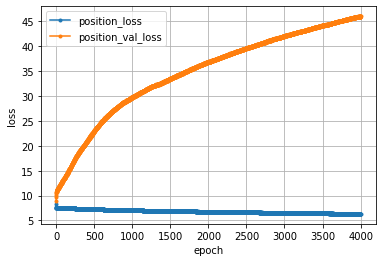

In [8]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

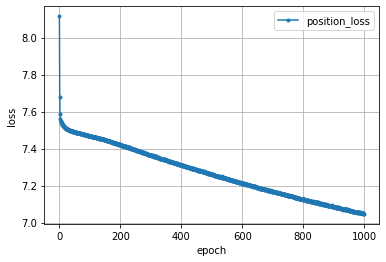

In [6]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [7]:
# 学習(位置)
epochs = 4000
batch_size = 128
position_history = position_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 1767 samples, validate on 442 samples
Epoch 1/4000
1767/1767 [==============================] - 1s 294us/step - loss: 7.0456 - accuracy: 0.0436 - val_loss: 33.3344 - val_accuracy: 0.0000e+00
Epoch 2/4000
1767/1767 [==============================] - 1s 288us/step - loss: 7.0448 - accuracy: 0.0453 - val_loss: 33.3215 - val_accuracy: 0.0000e+00
Epoch 3/4000
1767/1767 [==============================] - 1s 292us/step - loss: 7.0460 - accuracy: 0.0441 - val_loss: 33.2832 - val_accuracy: 0.0000e+00
Epoch 4/4000
1767/1767 [==============================] - 0s 283us/step - loss: 7.0456 - accuracy: 0.0413 - val_loss: 33.3647 - val_accuracy: 0.0000e+00
Epoch 5/4000
1767/1767 [==============================] - 1s 286us/step - loss: 7.0448 - accuracy: 0.0464 - val_loss: 33.3710 - val_accuracy: 0.0000e+00
Epoch 6/4000
1767/1767 [==============================] - 1s 285us/step - loss: 7.0494 - accuracy: 0.0447 - val_loss: 33.3607 - val_accuracy: 0.0000e+00
Epoch 7/4000
1767/1767 [===========

Epoch 54/4000
1767/1767 [==============================] - 1s 307us/step - loss: 7.0269 - accuracy: 0.0447 - val_loss: 33.5599 - val_accuracy: 0.0000e+00
Epoch 55/4000
1767/1767 [==============================] - 1s 324us/step - loss: 7.0267 - accuracy: 0.0447 - val_loss: 33.5158 - val_accuracy: 0.0000e+00
Epoch 56/4000
1767/1767 [==============================] - 1s 297us/step - loss: 7.0274 - accuracy: 0.0441 - val_loss: 33.5303 - val_accuracy: 0.0000e+00
Epoch 57/4000
1767/1767 [==============================] - 0s 279us/step - loss: 7.0284 - accuracy: 0.0436 - val_loss: 33.5553 - val_accuracy: 0.0000e+00
Epoch 58/4000
1767/1767 [==============================] - 1s 354us/step - loss: 7.0274 - accuracy: 0.0447 - val_loss: 33.5518 - val_accuracy: 0.0000e+00
Epoch 59/4000
1767/1767 [==============================] - 1s 294us/step - loss: 7.0256 - accuracy: 0.0430 - val_loss: 33.5850 - val_accuracy: 0.0000e+00
Epoch 60/4000
1767/1767 [==============================] - 1s 313us/step - l

1767/1767 [==============================] - 1s 289us/step - loss: 7.0114 - accuracy: 0.0436 - val_loss: 33.7561 - val_accuracy: 0.0000e+00
Epoch 108/4000
1767/1767 [==============================] - 1s 323us/step - loss: 7.0067 - accuracy: 0.0447 - val_loss: 33.7595 - val_accuracy: 0.0000e+00
Epoch 109/4000
1767/1767 [==============================] - 1s 312us/step - loss: 7.0088 - accuracy: 0.0447 - val_loss: 33.8261 - val_accuracy: 0.0000e+00
Epoch 110/4000
1767/1767 [==============================] - 0s 280us/step - loss: 7.0074 - accuracy: 0.0470 - val_loss: 33.7481 - val_accuracy: 0.0000e+00
Epoch 111/4000
1767/1767 [==============================] - 1s 283us/step - loss: 7.0065 - accuracy: 0.0470 - val_loss: 33.7812 - val_accuracy: 0.0000e+00
Epoch 112/4000
1767/1767 [==============================] - 1s 337us/step - loss: 7.0048 - accuracy: 0.0481 - val_loss: 33.7747 - val_accuracy: 0.0000e+00
Epoch 113/4000
1767/1767 [==============================] - 1s 288us/step - loss: 7.0

Epoch 160/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.9941 - accuracy: 0.0458 - val_loss: 33.9756 - val_accuracy: 0.0000e+00
Epoch 161/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.9936 - accuracy: 0.0470 - val_loss: 33.9866 - val_accuracy: 0.0000e+00
Epoch 162/4000
1767/1767 [==============================] - 1s 287us/step - loss: 6.9885 - accuracy: 0.0441 - val_loss: 33.9065 - val_accuracy: 0.0000e+00
Epoch 163/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.9894 - accuracy: 0.0458 - val_loss: 34.0048 - val_accuracy: 0.0000e+00
Epoch 164/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.9904 - accuracy: 0.0481 - val_loss: 33.9421 - val_accuracy: 0.0000e+00
Epoch 165/4000
1767/1767 [==============================] - 1s 402us/step - loss: 6.9915 - accuracy: 0.0475 - val_loss: 33.9668 - val_accuracy: 0.0000e+00
Epoch 166/4000
1767/1767 [==============================] - 1s 344us/s

Epoch 213/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.9775 - accuracy: 0.0481 - val_loss: 34.1514 - val_accuracy: 0.0000e+00
Epoch 214/4000
1767/1767 [==============================] - 1s 303us/step - loss: 6.9728 - accuracy: 0.0487 - val_loss: 34.0746 - val_accuracy: 0.0000e+00
Epoch 215/4000
1767/1767 [==============================] - 1s 323us/step - loss: 6.9736 - accuracy: 0.0492 - val_loss: 34.0500 - val_accuracy: 0.0000e+00
Epoch 216/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.9733 - accuracy: 0.0504 - val_loss: 34.0929 - val_accuracy: 0.0000e+00
Epoch 217/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.9727 - accuracy: 0.0481 - val_loss: 34.0925 - val_accuracy: 0.0000e+00
Epoch 218/4000
1767/1767 [==============================] - 1s 296us/step - loss: 6.9711 - accuracy: 0.0475 - val_loss: 34.0328 - val_accuracy: 0.0000e+00
Epoch 219/4000
1767/1767 [==============================] - 0s 280us/s

Epoch 266/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.9581 - accuracy: 0.0464 - val_loss: 34.1359 - val_accuracy: 0.0000e+00
Epoch 267/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.9549 - accuracy: 0.0526 - val_loss: 34.1571 - val_accuracy: 0.0000e+00
Epoch 268/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.9526 - accuracy: 0.0470 - val_loss: 34.1973 - val_accuracy: 0.0000e+00
Epoch 269/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.9549 - accuracy: 0.0481 - val_loss: 34.1404 - val_accuracy: 0.0000e+00
Epoch 270/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.9544 - accuracy: 0.0470 - val_loss: 34.1416 - val_accuracy: 0.0000e+00
Epoch 271/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.9556 - accuracy: 0.0509 - val_loss: 34.1463 - val_accuracy: 0.0000e+00
Epoch 272/4000
1767/1767 [==============================] - 1s 286us/s

1767/1767 [==============================] - 1s 341us/step - loss: 6.9353 - accuracy: 0.0515 - val_loss: 34.2279 - val_accuracy: 0.0000e+00
Epoch 319/4000
1767/1767 [==============================] - 1s 307us/step - loss: 6.9384 - accuracy: 0.0475 - val_loss: 34.2467 - val_accuracy: 0.0000e+00
Epoch 320/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.9353 - accuracy: 0.0504 - val_loss: 34.2807 - val_accuracy: 0.0000e+00
Epoch 321/4000
1767/1767 [==============================] - 1s 296us/step - loss: 6.9359 - accuracy: 0.0526 - val_loss: 34.2247 - val_accuracy: 0.0000e+00
Epoch 322/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.9350 - accuracy: 0.0504 - val_loss: 34.2913 - val_accuracy: 0.0000e+00
Epoch 323/4000
1767/1767 [==============================] - 1s 286us/step - loss: 6.9341 - accuracy: 0.0504 - val_loss: 34.2504 - val_accuracy: 0.0000e+00
Epoch 324/4000
1767/1767 [==============================] - 1s 298us/step - loss: 6.9

Epoch 371/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.9244 - accuracy: 0.0526 - val_loss: 34.3330 - val_accuracy: 0.0000e+00
Epoch 372/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.9222 - accuracy: 0.0515 - val_loss: 34.3675 - val_accuracy: 0.0000e+00
Epoch 373/4000
1767/1767 [==============================] - 1s 287us/step - loss: 6.9206 - accuracy: 0.0504 - val_loss: 34.4060 - val_accuracy: 0.0000e+00
Epoch 374/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.9202 - accuracy: 0.0521 - val_loss: 34.3593 - val_accuracy: 0.0000e+00
Epoch 375/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.9181 - accuracy: 0.0509 - val_loss: 34.3611 - val_accuracy: 0.0000e+00
Epoch 376/4000
1767/1767 [==============================] - 1s 286us/step - loss: 6.9203 - accuracy: 0.0515 - val_loss: 34.3983 - val_accuracy: 0.0000e+00
Epoch 377/4000
1767/1767 [==============================] - 1s 317us/s

Epoch 424/4000
1767/1767 [==============================] - 1s 283us/step - loss: 6.9028 - accuracy: 0.0532 - val_loss: 34.4268 - val_accuracy: 0.0000e+00
Epoch 425/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.9039 - accuracy: 0.0538 - val_loss: 34.3461 - val_accuracy: 0.0000e+00
Epoch 426/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.9010 - accuracy: 0.0560 - val_loss: 34.4257 - val_accuracy: 0.0000e+00
Epoch 427/4000
1767/1767 [==============================] - 0s 282us/step - loss: 6.9021 - accuracy: 0.0515 - val_loss: 34.3596 - val_accuracy: 0.0000e+00
Epoch 428/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.9013 - accuracy: 0.0515 - val_loss: 34.3909 - val_accuracy: 0.0000e+00
Epoch 429/4000
1767/1767 [==============================] - 1s 314us/step - loss: 6.9021 - accuracy: 0.0521 - val_loss: 34.3573 - val_accuracy: 0.0000e+00
Epoch 430/4000
1767/1767 [==============================] - 1s 324us/s

Epoch 477/4000
1767/1767 [==============================] - 1s 298us/step - loss: 6.8877 - accuracy: 0.0566 - val_loss: 34.3774 - val_accuracy: 0.0000e+00
Epoch 478/4000
1767/1767 [==============================] - 1s 292us/step - loss: 6.8862 - accuracy: 0.0532 - val_loss: 34.3734 - val_accuracy: 0.0000e+00
Epoch 479/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.8873 - accuracy: 0.0532 - val_loss: 34.3755 - val_accuracy: 0.0000e+00
Epoch 480/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.8942 - accuracy: 0.0498 - val_loss: 34.4158 - val_accuracy: 0.0000e+00
Epoch 481/4000
1767/1767 [==============================] - 1s 295us/step - loss: 6.8896 - accuracy: 0.0549 - val_loss: 34.3794 - val_accuracy: 0.0000e+00
Epoch 482/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.8839 - accuracy: 0.0543 - val_loss: 34.4284 - val_accuracy: 0.0000e+00
Epoch 483/4000
1767/1767 [==============================] - 1s 298us/s

Epoch 530/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.8668 - accuracy: 0.0572 - val_loss: 34.2452 - val_accuracy: 0.0000e+00
Epoch 531/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.8713 - accuracy: 0.0555 - val_loss: 34.2540 - val_accuracy: 0.0000e+00
Epoch 532/4000
1767/1767 [==============================] - 1s 297us/step - loss: 6.8665 - accuracy: 0.0521 - val_loss: 34.2641 - val_accuracy: 0.0000e+00
Epoch 533/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.8681 - accuracy: 0.0526 - val_loss: 34.2596 - val_accuracy: 0.0000e+00
Epoch 534/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.8680 - accuracy: 0.0538 - val_loss: 34.2693 - val_accuracy: 0.0000e+00
Epoch 535/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.8697 - accuracy: 0.0543 - val_loss: 34.2730 - val_accuracy: 0.0000e+00
Epoch 536/4000
1767/1767 [==============================] - 1s 294us/s

Epoch 583/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.8508 - accuracy: 0.0594 - val_loss: 34.1102 - val_accuracy: 0.0000e+00
Epoch 584/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.8505 - accuracy: 0.0549 - val_loss: 34.0664 - val_accuracy: 0.0000e+00
Epoch 585/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.8493 - accuracy: 0.0543 - val_loss: 34.0983 - val_accuracy: 0.0000e+00
Epoch 586/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.8539 - accuracy: 0.0566 - val_loss: 34.0945 - val_accuracy: 0.0000e+00
Epoch 587/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.8494 - accuracy: 0.0566 - val_loss: 34.0553 - val_accuracy: 0.0000e+00
Epoch 588/4000
1767/1767 [==============================] - 1s 311us/step - loss: 6.8517 - accuracy: 0.0538 - val_loss: 34.0844 - val_accuracy: 0.0000e+00
Epoch 589/4000
1767/1767 [==============================] - 1s 324us/s

Epoch 636/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.8366 - accuracy: 0.0555 - val_loss: 34.2406 - val_accuracy: 0.0000e+00
Epoch 637/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.8357 - accuracy: 0.0577 - val_loss: 34.2463 - val_accuracy: 0.0000e+00
Epoch 638/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.8334 - accuracy: 0.0589 - val_loss: 34.2192 - val_accuracy: 0.0000e+00
Epoch 639/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.8341 - accuracy: 0.0566 - val_loss: 34.2292 - val_accuracy: 0.0000e+00
Epoch 640/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.8357 - accuracy: 0.0526 - val_loss: 34.2712 - val_accuracy: 0.0000e+00
Epoch 641/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.8380 - accuracy: 0.0577 - val_loss: 34.2132 - val_accuracy: 0.0000e+00
Epoch 642/4000
1767/1767 [==============================] - 1s 284us/s

Epoch 689/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.8191 - accuracy: 0.0606 - val_loss: 34.4270 - val_accuracy: 0.0000e+00
Epoch 690/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.8161 - accuracy: 0.0560 - val_loss: 34.3994 - val_accuracy: 0.0000e+00
Epoch 691/4000
1767/1767 [==============================] - 0s 282us/step - loss: 6.8165 - accuracy: 0.0577 - val_loss: 34.4588 - val_accuracy: 0.0000e+00
Epoch 692/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.8220 - accuracy: 0.0560 - val_loss: 34.4687 - val_accuracy: 0.0000e+00
Epoch 693/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.8201 - accuracy: 0.0577 - val_loss: 34.4872 - val_accuracy: 0.0000e+00
Epoch 694/4000
1767/1767 [==============================] - 1s 286us/step - loss: 6.8157 - accuracy: 0.0577 - val_loss: 34.4496 - val_accuracy: 0.0000e+00
Epoch 695/4000
1767/1767 [==============================] - 1s 289us/s

Epoch 742/4000
1767/1767 [==============================] - 1s 286us/step - loss: 6.8047 - accuracy: 0.0617 - val_loss: 34.7392 - val_accuracy: 0.0000e+00
Epoch 743/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.8051 - accuracy: 0.0640 - val_loss: 34.6198 - val_accuracy: 0.0000e+00
Epoch 744/4000
1767/1767 [==============================] - 1s 345us/step - loss: 6.8040 - accuracy: 0.0589 - val_loss: 34.7273 - val_accuracy: 0.0000e+00
Epoch 745/4000
1767/1767 [==============================] - 1s 319us/step - loss: 6.7996 - accuracy: 0.0606 - val_loss: 34.6788 - val_accuracy: 0.0000e+00
Epoch 746/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.7978 - accuracy: 0.0600 - val_loss: 34.7464 - val_accuracy: 0.0000e+00
Epoch 747/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.8012 - accuracy: 0.0617 - val_loss: 34.6788 - val_accuracy: 0.0000e+00
Epoch 748/4000
1767/1767 [==============================] - 1s 292us/s

Epoch 795/4000
1767/1767 [==============================] - 0s 265us/step - loss: 6.7845 - accuracy: 0.0634 - val_loss: 34.9508 - val_accuracy: 0.0000e+00
Epoch 796/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.7871 - accuracy: 0.0589 - val_loss: 34.9390 - val_accuracy: 0.0000e+00
Epoch 797/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.7878 - accuracy: 0.0617 - val_loss: 34.9309 - val_accuracy: 0.0000e+00
Epoch 798/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.7893 - accuracy: 0.0583 - val_loss: 34.9562 - val_accuracy: 0.0000e+00
Epoch 799/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.7878 - accuracy: 0.0606 - val_loss: 35.0379 - val_accuracy: 0.0000e+00
Epoch 800/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.7843 - accuracy: 0.0628 - val_loss: 34.9354 - val_accuracy: 0.0000e+00
Epoch 801/4000
1767/1767 [==============================] - 0s 263us/s

Epoch 848/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.7673 - accuracy: 0.0645 - val_loss: 35.2192 - val_accuracy: 0.0000e+00
Epoch 849/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.7669 - accuracy: 0.0640 - val_loss: 35.2713 - val_accuracy: 0.0000e+00
Epoch 850/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.7719 - accuracy: 0.0577 - val_loss: 35.2745 - val_accuracy: 0.0000e+00
Epoch 851/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.7708 - accuracy: 0.0606 - val_loss: 35.2685 - val_accuracy: 0.0000e+00
Epoch 852/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.7744 - accuracy: 0.0634 - val_loss: 35.2633 - val_accuracy: 0.0000e+00
Epoch 853/4000
1767/1767 [==============================] - 0s 268us/step - loss: 6.7744 - accuracy: 0.0623 - val_loss: 35.3038 - val_accuracy: 0.0000e+00
Epoch 854/4000
1767/1767 [==============================] - 0s 267us/s

Epoch 901/4000
1767/1767 [==============================] - 1s 302us/step - loss: 6.7544 - accuracy: 0.0628 - val_loss: 35.5565 - val_accuracy: 0.0000e+00
Epoch 902/4000
1767/1767 [==============================] - 1s 329us/step - loss: 6.7534 - accuracy: 0.0634 - val_loss: 35.5504 - val_accuracy: 0.0000e+00
Epoch 903/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.7537 - accuracy: 0.0651 - val_loss: 35.5982 - val_accuracy: 0.0000e+00
Epoch 904/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.7551 - accuracy: 0.0634 - val_loss: 35.5856 - val_accuracy: 0.0000e+00
Epoch 905/4000
1767/1767 [==============================] - 1s 313us/step - loss: 6.7518 - accuracy: 0.0634 - val_loss: 35.5980 - val_accuracy: 0.0000e+00
Epoch 906/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.7536 - accuracy: 0.0645 - val_loss: 35.5665 - val_accuracy: 0.0000e+00
Epoch 907/4000
1767/1767 [==============================] - 0s 257us/s

Epoch 954/4000
1767/1767 [==============================] - 1s 307us/step - loss: 6.7388 - accuracy: 0.0640 - val_loss: 35.9137 - val_accuracy: 0.0000e+00
Epoch 955/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.7381 - accuracy: 0.0617 - val_loss: 35.9450 - val_accuracy: 0.0000e+00
Epoch 956/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.7384 - accuracy: 0.0645 - val_loss: 35.9826 - val_accuracy: 0.0000e+00
Epoch 957/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.7393 - accuracy: 0.0634 - val_loss: 35.9451 - val_accuracy: 0.0000e+00
Epoch 958/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.7343 - accuracy: 0.0617 - val_loss: 35.9488 - val_accuracy: 0.0000e+00
Epoch 959/4000
1767/1767 [==============================] - 1s 326us/step - loss: 6.7368 - accuracy: 0.0640 - val_loss: 35.9064 - val_accuracy: 0.0000e+00
Epoch 960/4000
1767/1767 [==============================] - 1s 338us/s

Epoch 1007/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.7230 - accuracy: 0.0634 - val_loss: 36.2762 - val_accuracy: 0.0000e+00
Epoch 1008/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.7238 - accuracy: 0.0662 - val_loss: 36.3563 - val_accuracy: 0.0000e+00
Epoch 1009/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.7282 - accuracy: 0.0662 - val_loss: 36.3271 - val_accuracy: 0.0000e+00
Epoch 1010/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.7213 - accuracy: 0.0668 - val_loss: 36.3209 - val_accuracy: 0.0000e+00
Epoch 1011/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.7211 - accuracy: 0.0645 - val_loss: 36.3810 - val_accuracy: 0.0000e+00
Epoch 1012/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.7178 - accuracy: 0.0640 - val_loss: 36.3148 - val_accuracy: 0.0000e+00
Epoch 1013/4000
1767/1767 [==============================] - 0s 

1767/1767 [==============================] - 1s 306us/step - loss: 6.7087 - accuracy: 0.0673 - val_loss: 36.6504 - val_accuracy: 0.0000e+00
Epoch 1060/4000
1767/1767 [==============================] - 1s 287us/step - loss: 6.7088 - accuracy: 0.0662 - val_loss: 36.6276 - val_accuracy: 0.0000e+00
Epoch 1061/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.7052 - accuracy: 0.0640 - val_loss: 36.6948 - val_accuracy: 0.0000e+00
Epoch 1062/4000
1767/1767 [==============================] - 1s 283us/step - loss: 6.7109 - accuracy: 0.0656 - val_loss: 36.6628 - val_accuracy: 0.0000e+00
Epoch 1063/4000
1767/1767 [==============================] - 1s 300us/step - loss: 6.7057 - accuracy: 0.0662 - val_loss: 36.6701 - val_accuracy: 0.0000e+00
Epoch 1064/4000
1767/1767 [==============================] - 1s 295us/step - loss: 6.7081 - accuracy: 0.0656 - val_loss: 36.6860 - val_accuracy: 0.0000e+00
Epoch 1065/4000
1767/1767 [==============================] - 1s 291us/step - los

1767/1767 [==============================] - 1s 312us/step - loss: 6.6895 - accuracy: 0.0668 - val_loss: 37.0164 - val_accuracy: 0.0000e+00
Epoch 1112/4000
1767/1767 [==============================] - 1s 356us/step - loss: 6.6908 - accuracy: 0.0651 - val_loss: 36.9882 - val_accuracy: 0.0000e+00
Epoch 1113/4000
1767/1767 [==============================] - 1s 350us/step - loss: 6.6938 - accuracy: 0.0668 - val_loss: 37.0481 - val_accuracy: 0.0000e+00
Epoch 1114/4000
1767/1767 [==============================] - 1s 343us/step - loss: 6.6889 - accuracy: 0.0668 - val_loss: 37.0856 - val_accuracy: 0.0000e+00
Epoch 1115/4000
1767/1767 [==============================] - 1s 308us/step - loss: 6.6906 - accuracy: 0.0668 - val_loss: 37.0119 - val_accuracy: 0.0000e+00
Epoch 1116/4000
1767/1767 [==============================] - 1s 288us/step - loss: 6.6880 - accuracy: 0.0679 - val_loss: 37.0754 - val_accuracy: 0.0000e+00
Epoch 1117/4000
1767/1767 [==============================] - 1s 304us/step - los

1767/1767 [==============================] - 1s 344us/step - loss: 6.6774 - accuracy: 0.0651 - val_loss: 37.3576 - val_accuracy: 0.0000e+00
Epoch 1164/4000
1767/1767 [==============================] - 1s 381us/step - loss: 6.6767 - accuracy: 0.0696 - val_loss: 37.3287 - val_accuracy: 0.0000e+00
Epoch 1165/4000
1767/1767 [==============================] - 1s 393us/step - loss: 6.6781 - accuracy: 0.0668 - val_loss: 37.3727 - val_accuracy: 0.0000e+00
Epoch 1166/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.6780 - accuracy: 0.0640 - val_loss: 37.3071 - val_accuracy: 0.0000e+00
Epoch 1167/4000
1767/1767 [==============================] - 1s 342us/step - loss: 6.6725 - accuracy: 0.0690 - val_loss: 37.3466 - val_accuracy: 0.0000e+00
Epoch 1168/4000
1767/1767 [==============================] - 1s 376us/step - loss: 6.6761 - accuracy: 0.0668 - val_loss: 37.3506 - val_accuracy: 0.0000e+00
Epoch 1169/4000
1767/1767 [==============================] - 1s 649us/step - los

1767/1767 [==============================] - 0s 251us/step - loss: 6.6633 - accuracy: 0.0702 - val_loss: 37.5932 - val_accuracy: 0.0000e+00
Epoch 1216/4000
1767/1767 [==============================] - 0s 251us/step - loss: 6.6593 - accuracy: 0.0679 - val_loss: 37.6952 - val_accuracy: 0.0000e+00
Epoch 1217/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.6631 - accuracy: 0.0690 - val_loss: 37.6336 - val_accuracy: 0.0000e+00
Epoch 1218/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.6599 - accuracy: 0.0713 - val_loss: 37.6607 - val_accuracy: 0.0000e+00
Epoch 1219/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.6595 - accuracy: 0.0702 - val_loss: 37.6772 - val_accuracy: 0.0000e+00
Epoch 1220/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.6658 - accuracy: 0.0673 - val_loss: 37.6676 - val_accuracy: 0.0000e+00
Epoch 1221/4000
1767/1767 [==============================] - 0s 249us/step - los

1767/1767 [==============================] - 0s 259us/step - loss: 6.6489 - accuracy: 0.0679 - val_loss: 38.0059 - val_accuracy: 0.0000e+00
Epoch 1268/4000
1767/1767 [==============================] - 0s 265us/step - loss: 6.6457 - accuracy: 0.0707 - val_loss: 37.9449 - val_accuracy: 0.0000e+00
Epoch 1269/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.6489 - accuracy: 0.0730 - val_loss: 37.9282 - val_accuracy: 0.0000e+00
Epoch 1270/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.6468 - accuracy: 0.0685 - val_loss: 37.9892 - val_accuracy: 0.0000e+00
Epoch 1271/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.6465 - accuracy: 0.0707 - val_loss: 37.9780 - val_accuracy: 0.0000e+00
Epoch 1272/4000
1767/1767 [==============================] - 0s 253us/step - loss: 6.6445 - accuracy: 0.0702 - val_loss: 37.9511 - val_accuracy: 0.0000e+00
Epoch 1273/4000
1767/1767 [==============================] - 0s 253us/step - los

1767/1767 [==============================] - 1s 314us/step - loss: 6.6334 - accuracy: 0.0679 - val_loss: 38.2659 - val_accuracy: 0.0000e+00
Epoch 1320/4000
1767/1767 [==============================] - 1s 304us/step - loss: 6.6307 - accuracy: 0.0730 - val_loss: 38.3178 - val_accuracy: 0.0000e+00
Epoch 1321/4000
1767/1767 [==============================] - 1s 328us/step - loss: 6.6341 - accuracy: 0.0724 - val_loss: 38.2596 - val_accuracy: 0.0000e+00
Epoch 1322/4000
1767/1767 [==============================] - 1s 301us/step - loss: 6.6357 - accuracy: 0.0679 - val_loss: 38.3088 - val_accuracy: 0.0000e+00
Epoch 1323/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.6318 - accuracy: 0.0662 - val_loss: 38.3081 - val_accuracy: 0.0000e+00
Epoch 1324/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.6339 - accuracy: 0.0707 - val_loss: 38.2373 - val_accuracy: 0.0000e+00
Epoch 1325/4000
1767/1767 [==============================] - 0s 259us/step - los

1767/1767 [==============================] - 0s 260us/step - loss: 6.6186 - accuracy: 0.0730 - val_loss: 38.5125 - val_accuracy: 0.0000e+00
Epoch 1372/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.6206 - accuracy: 0.0724 - val_loss: 38.5863 - val_accuracy: 0.0000e+00
Epoch 1373/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.6197 - accuracy: 0.0741 - val_loss: 38.5644 - val_accuracy: 0.0000e+00
Epoch 1374/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.6163 - accuracy: 0.0719 - val_loss: 38.5586 - val_accuracy: 0.0000e+00
Epoch 1375/4000
1767/1767 [==============================] - 0s 255us/step - loss: 6.6198 - accuracy: 0.0741 - val_loss: 38.5914 - val_accuracy: 0.0000e+00
Epoch 1376/4000
1767/1767 [==============================] - 0s 246us/step - loss: 6.6143 - accuracy: 0.0702 - val_loss: 38.5860 - val_accuracy: 0.0000e+00
Epoch 1377/4000
1767/1767 [==============================] - 0s 249us/step - los

1767/1767 [==============================] - 0s 253us/step - loss: 6.6010 - accuracy: 0.0696 - val_loss: 38.8345 - val_accuracy: 0.0000e+00
Epoch 1424/4000
1767/1767 [==============================] - 1s 296us/step - loss: 6.6029 - accuracy: 0.0713 - val_loss: 38.8558 - val_accuracy: 0.0000e+00
Epoch 1425/4000
1767/1767 [==============================] - 1s 335us/step - loss: 6.6056 - accuracy: 0.0724 - val_loss: 38.8715 - val_accuracy: 0.0000e+00
Epoch 1426/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.6044 - accuracy: 0.0713 - val_loss: 38.8429 - val_accuracy: 0.0000e+00
Epoch 1427/4000
1767/1767 [==============================] - 1s 338us/step - loss: 6.6053 - accuracy: 0.0747 - val_loss: 38.8453 - val_accuracy: 0.0000e+00
Epoch 1428/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.6083 - accuracy: 0.0724 - val_loss: 38.8476 - val_accuracy: 0.0000e+00
Epoch 1429/4000
1767/1767 [==============================] - 1s 301us/step - los

1767/1767 [==============================] - 0s 263us/step - loss: 6.5871 - accuracy: 0.0758 - val_loss: 39.0920 - val_accuracy: 0.0000e+00
Epoch 1476/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.5883 - accuracy: 0.0747 - val_loss: 39.1142 - val_accuracy: 0.0000e+00
Epoch 1477/4000
1767/1767 [==============================] - 0s 255us/step - loss: 6.5877 - accuracy: 0.0747 - val_loss: 39.1651 - val_accuracy: 0.0000e+00
Epoch 1478/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.5898 - accuracy: 0.0741 - val_loss: 39.1319 - val_accuracy: 0.0000e+00
Epoch 1479/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.5866 - accuracy: 0.0741 - val_loss: 39.1293 - val_accuracy: 0.0000e+00
Epoch 1480/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.5895 - accuracy: 0.0696 - val_loss: 39.1467 - val_accuracy: 0.0000e+00
Epoch 1481/4000
1767/1767 [==============================] - 0s 250us/step - los

1767/1767 [==============================] - 0s 256us/step - loss: 6.5728 - accuracy: 0.0753 - val_loss: 39.3819 - val_accuracy: 0.0000e+00
Epoch 1528/4000
1767/1767 [==============================] - 1s 297us/step - loss: 6.5748 - accuracy: 0.0747 - val_loss: 39.4524 - val_accuracy: 0.0000e+00
Epoch 1529/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.5744 - accuracy: 0.0713 - val_loss: 39.3009 - val_accuracy: 0.0000e+00
Epoch 1530/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.5734 - accuracy: 0.0764 - val_loss: 39.4789 - val_accuracy: 0.0000e+00
Epoch 1531/4000
1767/1767 [==============================] - 1s 321us/step - loss: 6.5725 - accuracy: 0.0730 - val_loss: 39.3844 - val_accuracy: 0.0000e+00
Epoch 1532/4000
1767/1767 [==============================] - 1s 327us/step - loss: 6.5752 - accuracy: 0.0724 - val_loss: 39.4607 - val_accuracy: 0.0000e+00
Epoch 1533/4000
1767/1767 [==============================] - 0s 271us/step - los

1767/1767 [==============================] - 1s 288us/step - loss: 6.5599 - accuracy: 0.0747 - val_loss: 39.7011 - val_accuracy: 0.0000e+00
Epoch 1580/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.5578 - accuracy: 0.0736 - val_loss: 39.6571 - val_accuracy: 0.0000e+00
Epoch 1581/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.5586 - accuracy: 0.0724 - val_loss: 39.6354 - val_accuracy: 0.0000e+00
Epoch 1582/4000
1767/1767 [==============================] - 0s 265us/step - loss: 6.5548 - accuracy: 0.0770 - val_loss: 39.6366 - val_accuracy: 0.0000e+00
Epoch 1583/4000
1767/1767 [==============================] - 1s 317us/step - loss: 6.5583 - accuracy: 0.0747 - val_loss: 39.7249 - val_accuracy: 0.0000e+00
Epoch 1584/4000
1767/1767 [==============================] - 1s 303us/step - loss: 6.5615 - accuracy: 0.0724 - val_loss: 39.6625 - val_accuracy: 0.0000e+00
Epoch 1585/4000
1767/1767 [==============================] - 1s 300us/step - los

1767/1767 [==============================] - 0s 257us/step - loss: 6.5437 - accuracy: 0.0775 - val_loss: 39.7574 - val_accuracy: 0.0000e+00
Epoch 1632/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.5407 - accuracy: 0.0719 - val_loss: 39.7797 - val_accuracy: 0.0000e+00
Epoch 1633/4000
1767/1767 [==============================] - 0s 253us/step - loss: 6.5440 - accuracy: 0.0747 - val_loss: 39.8689 - val_accuracy: 0.0000e+00
Epoch 1634/4000
1767/1767 [==============================] - 0s 268us/step - loss: 6.5469 - accuracy: 0.0730 - val_loss: 39.8021 - val_accuracy: 0.0000e+00
Epoch 1635/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.5420 - accuracy: 0.0775 - val_loss: 39.7444 - val_accuracy: 0.0000e+00
Epoch 1636/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.5429 - accuracy: 0.0787 - val_loss: 39.8205 - val_accuracy: 0.0000e+00
Epoch 1637/4000
1767/1767 [==============================] - 0s 254us/step - los

1767/1767 [==============================] - 0s 261us/step - loss: 6.5316 - accuracy: 0.0758 - val_loss: 40.0699 - val_accuracy: 0.0000e+00
Epoch 1684/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.5295 - accuracy: 0.0798 - val_loss: 40.0815 - val_accuracy: 0.0000e+00
Epoch 1685/4000
1767/1767 [==============================] - 0s 254us/step - loss: 6.5297 - accuracy: 0.0781 - val_loss: 39.9866 - val_accuracy: 0.0000e+00
Epoch 1686/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.5254 - accuracy: 0.0758 - val_loss: 40.0359 - val_accuracy: 0.0000e+00
Epoch 1687/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.5291 - accuracy: 0.0798 - val_loss: 40.0274 - val_accuracy: 0.0000e+00
Epoch 1688/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.5303 - accuracy: 0.0764 - val_loss: 40.1119 - val_accuracy: 0.0000e+00
Epoch 1689/4000
1767/1767 [==============================] - 0s 251us/step - los

1767/1767 [==============================] - 1s 293us/step - loss: 6.5164 - accuracy: 0.0781 - val_loss: 40.1857 - val_accuracy: 0.0000e+00
Epoch 1736/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.5175 - accuracy: 0.0775 - val_loss: 40.2594 - val_accuracy: 0.0000e+00
Epoch 1737/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.5160 - accuracy: 0.0770 - val_loss: 40.2737 - val_accuracy: 0.0000e+00
Epoch 1738/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.5150 - accuracy: 0.0764 - val_loss: 40.2643 - val_accuracy: 0.0000e+00
Epoch 1739/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.5186 - accuracy: 0.0775 - val_loss: 40.3061 - val_accuracy: 0.0000e+00
Epoch 1740/4000
1767/1767 [==============================] - 0s 269us/step - loss: 6.5112 - accuracy: 0.0764 - val_loss: 40.1805 - val_accuracy: 0.0000e+00
Epoch 1741/4000
1767/1767 [==============================] - 1s 301us/step - los

1767/1767 [==============================] - 0s 262us/step - loss: 6.5035 - accuracy: 0.0804 - val_loss: 40.5356 - val_accuracy: 0.0000e+00
Epoch 1788/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.5029 - accuracy: 0.0781 - val_loss: 40.5434 - val_accuracy: 0.0000e+00
Epoch 1789/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.5021 - accuracy: 0.0798 - val_loss: 40.5501 - val_accuracy: 0.0000e+00
Epoch 1790/4000
1767/1767 [==============================] - 1s 347us/step - loss: 6.5007 - accuracy: 0.0781 - val_loss: 40.5341 - val_accuracy: 0.0000e+00
Epoch 1791/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.5009 - accuracy: 0.0770 - val_loss: 40.5275 - val_accuracy: 0.0000e+00
Epoch 1792/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.5012 - accuracy: 0.0770 - val_loss: 40.5767 - val_accuracy: 0.0000e+00
Epoch 1793/4000
1767/1767 [==============================] - 0s 283us/step - los

1767/1767 [==============================] - 1s 299us/step - loss: 6.4887 - accuracy: 0.0821 - val_loss: 40.7520 - val_accuracy: 0.0000e+00
Epoch 1840/4000
1767/1767 [==============================] - 1s 298us/step - loss: 6.4869 - accuracy: 0.0792 - val_loss: 40.7638 - val_accuracy: 0.0000e+00
Epoch 1841/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.4882 - accuracy: 0.0821 - val_loss: 40.7215 - val_accuracy: 0.0000e+00
Epoch 1842/4000
1767/1767 [==============================] - 0s 278us/step - loss: 6.4906 - accuracy: 0.0764 - val_loss: 40.6436 - val_accuracy: 0.0000e+00
Epoch 1843/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.4894 - accuracy: 0.0792 - val_loss: 40.8583 - val_accuracy: 0.0000e+00
Epoch 1844/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.4856 - accuracy: 0.0787 - val_loss: 40.8621 - val_accuracy: 0.0000e+00
Epoch 1845/4000
1767/1767 [==============================] - 0s 267us/step - los

1767/1767 [==============================] - 0s 248us/step - loss: 6.4785 - accuracy: 0.0787 - val_loss: 40.9737 - val_accuracy: 0.0000e+00
Epoch 1892/4000
1767/1767 [==============================] - 0s 253us/step - loss: 6.4778 - accuracy: 0.0770 - val_loss: 41.0397 - val_accuracy: 0.0000e+00
Epoch 1893/4000
1767/1767 [==============================] - 0s 249us/step - loss: 6.4810 - accuracy: 0.0758 - val_loss: 41.0948 - val_accuracy: 0.0000e+00
Epoch 1894/4000
1767/1767 [==============================] - 0s 252us/step - loss: 6.4785 - accuracy: 0.0809 - val_loss: 41.0191 - val_accuracy: 0.0000e+00
Epoch 1895/4000
1767/1767 [==============================] - 0s 254us/step - loss: 6.4766 - accuracy: 0.0775 - val_loss: 41.0225 - val_accuracy: 0.0000e+00
Epoch 1896/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.4715 - accuracy: 0.0792 - val_loss: 41.0378 - val_accuracy: 0.0000e+00
Epoch 1897/4000
1767/1767 [==============================] - 0s 253us/step - los

1767/1767 [==============================] - 0s 260us/step - loss: 6.4638 - accuracy: 0.0764 - val_loss: 41.2824 - val_accuracy: 0.0000e+00
Epoch 1944/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.4601 - accuracy: 0.0821 - val_loss: 41.3653 - val_accuracy: 0.0000e+00
Epoch 1945/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.4610 - accuracy: 0.0815 - val_loss: 41.2874 - val_accuracy: 0.0000e+00
Epoch 1946/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.4600 - accuracy: 0.0798 - val_loss: 41.3316 - val_accuracy: 0.0000e+00
Epoch 1947/4000
1767/1767 [==============================] - 1s 309us/step - loss: 6.4617 - accuracy: 0.0781 - val_loss: 41.3163 - val_accuracy: 0.0000e+00
Epoch 1948/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.4656 - accuracy: 0.0804 - val_loss: 41.3785 - val_accuracy: 0.0000e+00
Epoch 1949/4000
1767/1767 [==============================] - 0s 261us/step - los

Epoch 1996/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.4444 - accuracy: 0.0826 - val_loss: 41.5594 - val_accuracy: 0.0000e+00
Epoch 1997/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.4506 - accuracy: 0.0804 - val_loss: 41.4889 - val_accuracy: 0.0000e+00
Epoch 1998/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.4479 - accuracy: 0.0821 - val_loss: 41.5251 - val_accuracy: 0.0000e+00
Epoch 1999/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.4531 - accuracy: 0.0775 - val_loss: 41.6689 - val_accuracy: 0.0000e+00
Epoch 2000/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.4512 - accuracy: 0.0787 - val_loss: 41.5890 - val_accuracy: 0.0000e+00
Epoch 2001/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.4452 - accuracy: 0.0815 - val_loss: 41.5520 - val_accuracy: 0.0000e+00
Epoch 2002/4000
1767/1767 [==============================] - 0s 

1767/1767 [==============================] - 1s 306us/step - loss: 6.4384 - accuracy: 0.0838 - val_loss: 41.6658 - val_accuracy: 0.0000e+00
Epoch 2049/4000
1767/1767 [==============================] - 0s 282us/step - loss: 6.4327 - accuracy: 0.0804 - val_loss: 41.8396 - val_accuracy: 0.0000e+00
Epoch 2050/4000
1767/1767 [==============================] - 2303s 1s/step - loss: 6.4313 - accuracy: 0.0838 - val_loss: 41.8417 - val_accuracy: 0.0000e+00
Epoch 2051/4000
1767/1767 [==============================] - 1s 322us/step - loss: 6.4316 - accuracy: 0.0843 - val_loss: 41.6725 - val_accuracy: 0.0000e+00
Epoch 2052/4000
1767/1767 [==============================] - 1s 333us/step - loss: 6.4366 - accuracy: 0.0792 - val_loss: 41.7826 - val_accuracy: 0.0000e+00
Epoch 2053/4000
1767/1767 [==============================] - 0s 279us/step - loss: 6.4365 - accuracy: 0.0804 - val_loss: 41.7825 - val_accuracy: 0.0000e+00
Epoch 2054/4000
1767/1767 [==============================] - 0s 278us/step - los

 768/1767 [============>.................] - ETA: 1:21 - loss: 6.3254 - accuracy: 0.0911

/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (62.510886). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/anaconda3/envs/graduation_thesis/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (31.255916). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1767/1767 [==============================] - 63s 36ms/step - loss: 6.4204 - accuracy: 0.0838 - val_loss: 42.0455 - val_accuracy: 0.0000e+00
Epoch 2101/4000
1767/1767 [==============================] - 1s 435us/step - loss: 6.4170 - accuracy: 0.0855 - val_loss: 42.0614 - val_accuracy: 0.0000e+00
Epoch 2102/4000
1767/1767 [==============================] - 1s 317us/step - loss: 6.4230 - accuracy: 0.0832 - val_loss: 41.9977 - val_accuracy: 0.0000e+00
Epoch 2103/4000
1767/1767 [==============================] - 0s 274us/step - loss: 6.4196 - accuracy: 0.0792 - val_loss: 42.0165 - val_accuracy: 0.0000e+00
Epoch 2104/4000
1767/1767 [==============================] - 0s 253us/step - loss: 6.4166 - accuracy: 0.0832 - val_loss: 42.0261 - val_accuracy: 0.0000e+00
Epoch 2105/4000
1767/1767 [==============================] - 1s 301us/step - loss: 6.4147 - accuracy: 0.0843 - val_loss: 42.0654 - val_accuracy: 0.0000e+00
Epoch 2106/4000
1767/1767 [==============================] - 0s 270us/step - los

Epoch 2153/4000
1767/1767 [==============================] - 0s 279us/step - loss: 6.4081 - accuracy: 0.0826 - val_loss: 42.2064 - val_accuracy: 0.0000e+00
Epoch 2154/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.4085 - accuracy: 0.0832 - val_loss: 42.2481 - val_accuracy: 0.0000e+00
Epoch 2155/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.4056 - accuracy: 0.0838 - val_loss: 42.2856 - val_accuracy: 0.0000e+00
Epoch 2156/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.4076 - accuracy: 0.0866 - val_loss: 42.2247 - val_accuracy: 0.0000e+00
Epoch 2157/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.4068 - accuracy: 0.0821 - val_loss: 42.3351 - val_accuracy: 0.0000e+00
Epoch 2158/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.4099 - accuracy: 0.0832 - val_loss: 42.2819 - val_accuracy: 0.0000e+00
Epoch 2159/4000
1767/1767 [==============================] - 1s 

1767/1767 [==============================] - 0s 267us/step - loss: 6.3960 - accuracy: 0.0826 - val_loss: 42.5134 - val_accuracy: 0.0000e+00
Epoch 2206/4000
1767/1767 [==============================] - 0s 271us/step - loss: 6.3986 - accuracy: 0.0866 - val_loss: 42.4904 - val_accuracy: 0.0000e+00
Epoch 2207/4000
1767/1767 [==============================] - 1s 370us/step - loss: 6.3920 - accuracy: 0.0883 - val_loss: 42.5329 - val_accuracy: 0.0000e+00
Epoch 2208/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.3974 - accuracy: 0.0838 - val_loss: 42.4583 - val_accuracy: 0.0000e+00
Epoch 2209/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.3924 - accuracy: 0.0843 - val_loss: 42.4832 - val_accuracy: 0.0000e+00
Epoch 2210/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.3921 - accuracy: 0.0843 - val_loss: 42.5907 - val_accuracy: 0.0000e+00
Epoch 2211/4000
1767/1767 [==============================] - 0s 269us/step - los

Epoch 2258/4000
1767/1767 [==============================] - 0s 247us/step - loss: 6.3867 - accuracy: 0.0826 - val_loss: 42.8012 - val_accuracy: 0.0000e+00
Epoch 2259/4000
1767/1767 [==============================] - 1s 375us/step - loss: 6.3831 - accuracy: 0.0866 - val_loss: 42.7150 - val_accuracy: 0.0000e+00
Epoch 2260/4000
1767/1767 [==============================] - 1s 314us/step - loss: 6.3806 - accuracy: 0.0855 - val_loss: 42.6373 - val_accuracy: 0.0000e+00
Epoch 2261/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.3841 - accuracy: 0.0798 - val_loss: 42.7625 - val_accuracy: 0.0000e+00
Epoch 2262/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.3827 - accuracy: 0.0872 - val_loss: 42.7903 - val_accuracy: 0.0000e+00
Epoch 2263/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.3828 - accuracy: 0.0883 - val_loss: 42.7590 - val_accuracy: 0.0000e+00
Epoch 2264/4000
1767/1767 [==============================] - 0s 

1767/1767 [==============================] - 1s 337us/step - loss: 6.3756 - accuracy: 0.0905 - val_loss: 42.9551 - val_accuracy: 0.0000e+00
Epoch 2311/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.3711 - accuracy: 0.0877 - val_loss: 42.9815 - val_accuracy: 0.0000e+00
Epoch 2312/4000
1767/1767 [==============================] - 1s 304us/step - loss: 6.3665 - accuracy: 0.0838 - val_loss: 42.9403 - val_accuracy: 0.0000e+00
Epoch 2313/4000
1767/1767 [==============================] - 0s 268us/step - loss: 6.3677 - accuracy: 0.0855 - val_loss: 42.9650 - val_accuracy: 0.0000e+00
Epoch 2314/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.3679 - accuracy: 0.0838 - val_loss: 42.9450 - val_accuracy: 0.0000e+00
Epoch 2315/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.3700 - accuracy: 0.0877 - val_loss: 42.9993 - val_accuracy: 0.0000e+00
Epoch 2316/4000
1767/1767 [==============================] - 1s 319us/step - los

Epoch 2363/4000
1767/1767 [==============================] - 1s 417us/step - loss: 6.3623 - accuracy: 0.0889 - val_loss: 43.2168 - val_accuracy: 0.0000e+00
Epoch 2364/4000
1767/1767 [==============================] - 1s 368us/step - loss: 6.3590 - accuracy: 0.0889 - val_loss: 43.1610 - val_accuracy: 0.0000e+00
Epoch 2365/4000
1767/1767 [==============================] - 1s 472us/step - loss: 6.3553 - accuracy: 0.0838 - val_loss: 43.1667 - val_accuracy: 0.0000e+00
Epoch 2366/4000
1767/1767 [==============================] - 1s 300us/step - loss: 6.3511 - accuracy: 0.0838 - val_loss: 43.1235 - val_accuracy: 0.0000e+00
Epoch 2367/4000
1767/1767 [==============================] - 1s 300us/step - loss: 6.3551 - accuracy: 0.0905 - val_loss: 43.2222 - val_accuracy: 0.0000e+00
Epoch 2368/4000
1767/1767 [==============================] - 1s 308us/step - loss: 6.3520 - accuracy: 0.0894 - val_loss: 43.1653 - val_accuracy: 0.0000e+00
Epoch 2369/4000
1767/1767 [==============================] - 1s 

1767/1767 [==============================] - 1s 299us/step - loss: 6.3430 - accuracy: 0.0860 - val_loss: 43.3567 - val_accuracy: 0.0000e+00
Epoch 2416/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.3463 - accuracy: 0.0877 - val_loss: 43.4084 - val_accuracy: 0.0000e+00
Epoch 2417/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.3397 - accuracy: 0.0872 - val_loss: 43.2371 - val_accuracy: 0.0000e+00
Epoch 2418/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.3406 - accuracy: 0.0860 - val_loss: 43.4041 - val_accuracy: 0.0000e+00
Epoch 2419/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.3409 - accuracy: 0.0866 - val_loss: 43.3630 - val_accuracy: 0.0000e+00
Epoch 2420/4000
1767/1767 [==============================] - 1s 301us/step - loss: 6.3362 - accuracy: 0.0900 - val_loss: 43.3335 - val_accuracy: 0.0000e+00
Epoch 2421/4000
1767/1767 [==============================] - 1s 293us/step - los

1767/1767 [==============================] - 1s 304us/step - loss: 6.3310 - accuracy: 0.0883 - val_loss: 43.5769 - val_accuracy: 0.0000e+00
Epoch 2468/4000
1767/1767 [==============================] - 1s 498us/step - loss: 6.3298 - accuracy: 0.0855 - val_loss: 43.5105 - val_accuracy: 0.0000e+00
Epoch 2469/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.3280 - accuracy: 0.0883 - val_loss: 43.6026 - val_accuracy: 0.0000e+00
Epoch 2470/4000
1767/1767 [==============================] - 0s 268us/step - loss: 6.3323 - accuracy: 0.0838 - val_loss: 43.6264 - val_accuracy: 0.0000e+00
Epoch 2471/4000
1767/1767 [==============================] - 1s 329us/step - loss: 6.3272 - accuracy: 0.0872 - val_loss: 43.5405 - val_accuracy: 0.0000e+00
Epoch 2472/4000
1767/1767 [==============================] - 1s 375us/step - loss: 6.3251 - accuracy: 0.0889 - val_loss: 43.5646 - val_accuracy: 0.0000e+00
Epoch 2473/4000
1767/1767 [==============================] - 1s 299us/step - los

1767/1767 [==============================] - 0s 275us/step - loss: 6.3179 - accuracy: 0.0911 - val_loss: 43.8420 - val_accuracy: 0.0000e+00
Epoch 2520/4000
1767/1767 [==============================] - 1s 295us/step - loss: 6.3172 - accuracy: 0.0866 - val_loss: 43.7705 - val_accuracy: 0.0000e+00
Epoch 2521/4000
1767/1767 [==============================] - 1s 395us/step - loss: 6.3158 - accuracy: 0.0900 - val_loss: 43.7717 - val_accuracy: 0.0000e+00
Epoch 2522/4000
1767/1767 [==============================] - 1s 343us/step - loss: 6.3146 - accuracy: 0.0866 - val_loss: 43.7090 - val_accuracy: 0.0000e+00
Epoch 2523/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.3137 - accuracy: 0.0826 - val_loss: 43.7995 - val_accuracy: 0.0000e+00
Epoch 2524/4000
1767/1767 [==============================] - 0s 283us/step - loss: 6.3217 - accuracy: 0.0894 - val_loss: 43.9129 - val_accuracy: 0.0000e+00
Epoch 2525/4000
1767/1767 [==============================] - 0s 269us/step - los

1767/1767 [==============================] - 0s 268us/step - loss: 6.3039 - accuracy: 0.0877 - val_loss: 43.9989 - val_accuracy: 0.0000e+00
Epoch 2572/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.3070 - accuracy: 0.0900 - val_loss: 43.9438 - val_accuracy: 0.0000e+00
Epoch 2573/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.3040 - accuracy: 0.0939 - val_loss: 43.9439 - val_accuracy: 0.0000e+00
Epoch 2574/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.3076 - accuracy: 0.0855 - val_loss: 44.0129 - val_accuracy: 0.0000e+00
Epoch 2575/4000
1767/1767 [==============================] - 0s 268us/step - loss: 6.3027 - accuracy: 0.0945 - val_loss: 43.9937 - val_accuracy: 0.0000e+00
Epoch 2576/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.3040 - accuracy: 0.0860 - val_loss: 43.9802 - val_accuracy: 0.0000e+00
Epoch 2577/4000
1767/1767 [==============================] - 1s 310us/step - los

1767/1767 [==============================] - 1s 297us/step - loss: 6.2919 - accuracy: 0.0911 - val_loss: 44.1561 - val_accuracy: 0.0000e+00
Epoch 2624/4000
1767/1767 [==============================] - 1s 420us/step - loss: 6.2913 - accuracy: 0.0883 - val_loss: 44.1613 - val_accuracy: 0.0000e+00
Epoch 2625/4000
1767/1767 [==============================] - 1s 363us/step - loss: 6.2920 - accuracy: 0.0894 - val_loss: 44.2282 - val_accuracy: 0.0000e+00
Epoch 2626/4000
1767/1767 [==============================] - 1s 359us/step - loss: 6.2949 - accuracy: 0.0900 - val_loss: 44.2419 - val_accuracy: 0.0000e+00
Epoch 2627/4000
1767/1767 [==============================] - 1s 383us/step - loss: 6.2937 - accuracy: 0.0855 - val_loss: 44.2033 - val_accuracy: 0.0000e+00
Epoch 2628/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.2955 - accuracy: 0.0860 - val_loss: 44.1013 - val_accuracy: 0.0000e+00
Epoch 2629/4000
1767/1767 [==============================] - 1s 288us/step - los

1767/1767 [==============================] - 0s 258us/step - loss: 6.2824 - accuracy: 0.0934 - val_loss: 44.3589 - val_accuracy: 0.0000e+00
Epoch 2676/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.2820 - accuracy: 0.0939 - val_loss: 44.3637 - val_accuracy: 0.0000e+00
Epoch 2677/4000
1767/1767 [==============================] - 1s 356us/step - loss: 6.2873 - accuracy: 0.0934 - val_loss: 44.3909 - val_accuracy: 0.0000e+00
Epoch 2678/4000
1767/1767 [==============================] - 1s 349us/step - loss: 6.2796 - accuracy: 0.0883 - val_loss: 44.2940 - val_accuracy: 0.0000e+00
Epoch 2679/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.2813 - accuracy: 0.0905 - val_loss: 44.3718 - val_accuracy: 0.0000e+00
Epoch 2680/4000
1767/1767 [==============================] - 1s 284us/step - loss: 6.2795 - accuracy: 0.0900 - val_loss: 44.3798 - val_accuracy: 0.0000e+00
Epoch 2681/4000
1767/1767 [==============================] - 1s 348us/step - los

1767/1767 [==============================] - 0s 275us/step - loss: 6.2722 - accuracy: 0.0900 - val_loss: 44.6069 - val_accuracy: 0.0000e+00
Epoch 2728/4000
1767/1767 [==============================] - 1s 323us/step - loss: 6.2687 - accuracy: 0.0917 - val_loss: 44.6206 - val_accuracy: 0.0000e+00
Epoch 2729/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.2741 - accuracy: 0.0877 - val_loss: 44.6532 - val_accuracy: 0.0000e+00
Epoch 2730/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.2675 - accuracy: 0.0905 - val_loss: 44.6417 - val_accuracy: 0.0000e+00
Epoch 2731/4000
1767/1767 [==============================] - 0s 276us/step - loss: 6.2692 - accuracy: 0.0911 - val_loss: 44.5578 - val_accuracy: 0.0000e+00
Epoch 2732/4000
1767/1767 [==============================] - 1s 297us/step - loss: 6.2649 - accuracy: 0.0922 - val_loss: 44.6318 - val_accuracy: 0.0000e+00
Epoch 2733/4000
1767/1767 [==============================] - 0s 276us/step - los

1767/1767 [==============================] - 0s 259us/step - loss: 6.2603 - accuracy: 0.0922 - val_loss: 44.7651 - val_accuracy: 0.0000e+00
Epoch 2780/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.2585 - accuracy: 0.0951 - val_loss: 44.7001 - val_accuracy: 0.0000e+00
Epoch 2781/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.2529 - accuracy: 0.0922 - val_loss: 44.7092 - val_accuracy: 0.0000e+00
Epoch 2782/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.2546 - accuracy: 0.0928 - val_loss: 44.7870 - val_accuracy: 0.0000e+00
Epoch 2783/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.2557 - accuracy: 0.0917 - val_loss: 44.7231 - val_accuracy: 0.0000e+00
Epoch 2784/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.2531 - accuracy: 0.0934 - val_loss: 44.6771 - val_accuracy: 0.0000e+00
Epoch 2785/4000
1767/1767 [==============================] - 0s 256us/step - los

1767/1767 [==============================] - 0s 271us/step - loss: 6.2414 - accuracy: 0.0889 - val_loss: 45.0137 - val_accuracy: 0.0000e+00
Epoch 2832/4000
1767/1767 [==============================] - 1s 323us/step - loss: 6.2405 - accuracy: 0.0911 - val_loss: 44.8940 - val_accuracy: 0.0000e+00
Epoch 2833/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.2466 - accuracy: 0.0894 - val_loss: 44.9859 - val_accuracy: 0.0000e+00
Epoch 2834/4000
1767/1767 [==============================] - 1s 315us/step - loss: 6.2440 - accuracy: 0.0900 - val_loss: 45.0113 - val_accuracy: 0.0000e+00
Epoch 2835/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.2432 - accuracy: 0.0922 - val_loss: 44.8645 - val_accuracy: 0.0000e+00
Epoch 2836/4000
1767/1767 [==============================] - 0s 280us/step - loss: 6.2467 - accuracy: 0.0968 - val_loss: 44.9660 - val_accuracy: 0.0000e+00
Epoch 2837/4000
1767/1767 [==============================] - 0s 268us/step - los

1767/1767 [==============================] - 0s 255us/step - loss: 6.2308 - accuracy: 0.0894 - val_loss: 45.1227 - val_accuracy: 0.0000e+00
Epoch 2884/4000
1767/1767 [==============================] - 1s 289us/step - loss: 6.2332 - accuracy: 0.0911 - val_loss: 45.0501 - val_accuracy: 0.0000e+00
Epoch 2885/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.2332 - accuracy: 0.0928 - val_loss: 45.0098 - val_accuracy: 0.0000e+00
Epoch 2886/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.2342 - accuracy: 0.0911 - val_loss: 45.0822 - val_accuracy: 0.0000e+00
Epoch 2887/4000
1767/1767 [==============================] - 0s 255us/step - loss: 6.2319 - accuracy: 0.0928 - val_loss: 45.1168 - val_accuracy: 0.0000e+00
Epoch 2888/4000
1767/1767 [==============================] - 0s 281us/step - loss: 6.2339 - accuracy: 0.0945 - val_loss: 45.1206 - val_accuracy: 0.0000e+00
Epoch 2889/4000
1767/1767 [==============================] - 0s 254us/step - los

1767/1767 [==============================] - 0s 254us/step - loss: 6.2204 - accuracy: 0.0973 - val_loss: 45.3096 - val_accuracy: 0.0000e+00
Epoch 2936/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.2203 - accuracy: 0.0945 - val_loss: 45.3211 - val_accuracy: 0.0000e+00
Epoch 2937/4000
1767/1767 [==============================] - 0s 250us/step - loss: 6.2238 - accuracy: 0.0985 - val_loss: 45.3320 - val_accuracy: 0.0000e+00
Epoch 2938/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.2236 - accuracy: 0.0922 - val_loss: 45.3237 - val_accuracy: 0.0000e+00
Epoch 2939/4000
1767/1767 [==============================] - 0s 253us/step - loss: 6.2235 - accuracy: 0.0934 - val_loss: 45.3242 - val_accuracy: 0.0000e+00
Epoch 2940/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.2199 - accuracy: 0.0917 - val_loss: 45.2687 - val_accuracy: 0.0000e+00
Epoch 2941/4000
1767/1767 [==============================] - 0s 279us/step - los

1767/1767 [==============================] - 1s 291us/step - loss: 6.2181 - accuracy: 0.0934 - val_loss: 45.4342 - val_accuracy: 0.0000e+00
Epoch 2988/4000
1767/1767 [==============================] - 1s 293us/step - loss: 6.2106 - accuracy: 0.0939 - val_loss: 45.6359 - val_accuracy: 0.0000e+00
Epoch 2989/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.2117 - accuracy: 0.0934 - val_loss: 45.5383 - val_accuracy: 0.0000e+00
Epoch 2990/4000
1767/1767 [==============================] - 1s 302us/step - loss: 6.2124 - accuracy: 0.0945 - val_loss: 45.5290 - val_accuracy: 0.0000e+00
Epoch 2991/4000
1767/1767 [==============================] - 1s 295us/step - loss: 6.2093 - accuracy: 0.0951 - val_loss: 45.5463 - val_accuracy: 0.0000e+00
Epoch 2992/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.2082 - accuracy: 0.0945 - val_loss: 45.4951 - val_accuracy: 0.0000e+00
Epoch 2993/4000
1767/1767 [==============================] - 0s 281us/step - los

1767/1767 [==============================] - 0s 254us/step - loss: 6.1995 - accuracy: 0.0934 - val_loss: 45.6353 - val_accuracy: 0.0000e+00
Epoch 3040/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.2008 - accuracy: 0.0951 - val_loss: 45.5777 - val_accuracy: 0.0000e+00
Epoch 3041/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.2053 - accuracy: 0.0928 - val_loss: 45.6849 - val_accuracy: 0.0000e+00
Epoch 3042/4000
1767/1767 [==============================] - 1s 291us/step - loss: 6.2034 - accuracy: 0.0911 - val_loss: 45.5961 - val_accuracy: 0.0000e+00
Epoch 3043/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.1983 - accuracy: 0.0917 - val_loss: 45.5935 - val_accuracy: 0.0000e+00
Epoch 3044/4000
1767/1767 [==============================] - 1s 306us/step - loss: 6.1973 - accuracy: 0.0939 - val_loss: 45.6221 - val_accuracy: 0.0000e+00
Epoch 3045/4000
1767/1767 [==============================] - 1s 308us/step - los

1767/1767 [==============================] - 0s 273us/step - loss: 6.1903 - accuracy: 0.0900 - val_loss: 45.7624 - val_accuracy: 0.0000e+00
Epoch 3092/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.1988 - accuracy: 0.0934 - val_loss: 45.7129 - val_accuracy: 0.0000e+00
Epoch 3093/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.1934 - accuracy: 0.0956 - val_loss: 45.8331 - val_accuracy: 0.0000e+00
Epoch 3094/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.1816 - accuracy: 0.0973 - val_loss: 45.8002 - val_accuracy: 0.0000e+00
Epoch 3095/4000
1767/1767 [==============================] - 1s 309us/step - loss: 6.1858 - accuracy: 0.0939 - val_loss: 45.8002 - val_accuracy: 0.0000e+00
Epoch 3096/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.1854 - accuracy: 0.0962 - val_loss: 45.8232 - val_accuracy: 0.0000e+00
Epoch 3097/4000
1767/1767 [==============================] - 0s 260us/step - los

1767/1767 [==============================] - 0s 252us/step - loss: 6.1806 - accuracy: 0.0951 - val_loss: 45.9864 - val_accuracy: 0.0000e+00
Epoch 3144/4000
1767/1767 [==============================] - 0s 255us/step - loss: 6.1759 - accuracy: 0.0934 - val_loss: 46.0208 - val_accuracy: 0.0000e+00
Epoch 3145/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.1785 - accuracy: 0.0934 - val_loss: 46.0231 - val_accuracy: 0.0000e+00
Epoch 3146/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.1705 - accuracy: 0.0945 - val_loss: 46.0084 - val_accuracy: 0.0000e+00
Epoch 3147/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.1748 - accuracy: 0.0934 - val_loss: 46.0294 - val_accuracy: 0.0000e+00
Epoch 3148/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.1755 - accuracy: 0.0979 - val_loss: 45.9769 - val_accuracy: 0.0000e+00
Epoch 3149/4000
1767/1767 [==============================] - 0s 255us/step - los

1767/1767 [==============================] - 0s 253us/step - loss: 6.1642 - accuracy: 0.0973 - val_loss: 46.1623 - val_accuracy: 0.0000e+00
Epoch 3196/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.1649 - accuracy: 0.0945 - val_loss: 46.2174 - val_accuracy: 0.0000e+00
Epoch 3197/4000
1767/1767 [==============================] - 0s 251us/step - loss: 6.1693 - accuracy: 0.0917 - val_loss: 46.1068 - val_accuracy: 0.0000e+00
Epoch 3198/4000
1767/1767 [==============================] - 0s 254us/step - loss: 6.1648 - accuracy: 0.0951 - val_loss: 46.1394 - val_accuracy: 0.0000e+00
Epoch 3199/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.1653 - accuracy: 0.0951 - val_loss: 46.1204 - val_accuracy: 0.0000e+00
Epoch 3200/4000
1767/1767 [==============================] - 1s 310us/step - loss: 6.1609 - accuracy: 0.0945 - val_loss: 46.2396 - val_accuracy: 0.0000e+00
Epoch 3201/4000
1767/1767 [==============================] - 0s 258us/step - los

1767/1767 [==============================] - 1s 301us/step - loss: 6.1563 - accuracy: 0.0968 - val_loss: 46.3041 - val_accuracy: 0.0000e+00
Epoch 3248/4000
1767/1767 [==============================] - 1s 303us/step - loss: 6.1531 - accuracy: 0.0951 - val_loss: 46.2612 - val_accuracy: 0.0000e+00
Epoch 3249/4000
1767/1767 [==============================] - 1s 299us/step - loss: 6.1557 - accuracy: 0.0962 - val_loss: 46.2466 - val_accuracy: 0.0000e+00
Epoch 3250/4000
1767/1767 [==============================] - 1s 294us/step - loss: 6.1554 - accuracy: 0.0973 - val_loss: 46.2665 - val_accuracy: 0.0000e+00
Epoch 3251/4000
1767/1767 [==============================] - 1s 301us/step - loss: 6.1517 - accuracy: 0.0996 - val_loss: 46.2765 - val_accuracy: 0.0000e+00
Epoch 3252/4000
1767/1767 [==============================] - 1s 313us/step - loss: 6.1559 - accuracy: 0.0990 - val_loss: 46.3699 - val_accuracy: 0.0000e+00
Epoch 3253/4000
1767/1767 [==============================] - 1s 325us/step - los

1767/1767 [==============================] - 0s 249us/step - loss: 6.1365 - accuracy: 0.1024 - val_loss: 46.4603 - val_accuracy: 0.0000e+00
Epoch 3300/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.1420 - accuracy: 0.0973 - val_loss: 46.4220 - val_accuracy: 0.0000e+00
Epoch 3301/4000
1767/1767 [==============================] - 1s 306us/step - loss: 6.1396 - accuracy: 0.1041 - val_loss: 46.4568 - val_accuracy: 0.0000e+00
Epoch 3302/4000
1767/1767 [==============================] - 0s 247us/step - loss: 6.1385 - accuracy: 0.0985 - val_loss: 46.4985 - val_accuracy: 0.0000e+00
Epoch 3303/4000
1767/1767 [==============================] - 0s 247us/step - loss: 6.1377 - accuracy: 0.0962 - val_loss: 46.4386 - val_accuracy: 0.0000e+00
Epoch 3304/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.1469 - accuracy: 0.0973 - val_loss: 46.6058 - val_accuracy: 0.0000e+00
Epoch 3305/4000
1767/1767 [==============================] - 0s 267us/step - los

1767/1767 [==============================] - 1s 310us/step - loss: 6.1356 - accuracy: 0.0956 - val_loss: 46.5633 - val_accuracy: 0.0000e+00
Epoch 3352/4000
1767/1767 [==============================] - 1s 290us/step - loss: 6.1314 - accuracy: 0.0956 - val_loss: 46.6410 - val_accuracy: 0.0000e+00
Epoch 3353/4000
1767/1767 [==============================] - 1s 285us/step - loss: 6.1309 - accuracy: 0.0928 - val_loss: 46.7136 - val_accuracy: 0.0000e+00
Epoch 3354/4000
1767/1767 [==============================] - 1s 327us/step - loss: 6.1332 - accuracy: 0.1007 - val_loss: 46.7585 - val_accuracy: 0.0000e+00
Epoch 3355/4000
1767/1767 [==============================] - 1s 315us/step - loss: 6.1273 - accuracy: 0.1002 - val_loss: 46.7171 - val_accuracy: 0.0000e+00
Epoch 3356/4000
1767/1767 [==============================] - 1s 380us/step - loss: 6.1332 - accuracy: 0.0996 - val_loss: 46.5372 - val_accuracy: 0.0000e+00
Epoch 3357/4000
1767/1767 [==============================] - 1s 293us/step - los

1767/1767 [==============================] - 1s 372us/step - loss: 6.1242 - accuracy: 0.1013 - val_loss: 46.8251 - val_accuracy: 0.0000e+00
Epoch 3404/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.1197 - accuracy: 0.1013 - val_loss: 46.8582 - val_accuracy: 0.0000e+00
Epoch 3405/4000
1767/1767 [==============================] - 1s 345us/step - loss: 6.1212 - accuracy: 0.1024 - val_loss: 46.8112 - val_accuracy: 0.0000e+00
Epoch 3406/4000
1767/1767 [==============================] - 1s 305us/step - loss: 6.1189 - accuracy: 0.0990 - val_loss: 46.8739 - val_accuracy: 0.0000e+00
Epoch 3407/4000
1767/1767 [==============================] - 0s 275us/step - loss: 6.1182 - accuracy: 0.0962 - val_loss: 46.7975 - val_accuracy: 0.0000e+00
Epoch 3408/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.1234 - accuracy: 0.1019 - val_loss: 46.9071 - val_accuracy: 0.0000e+00
Epoch 3409/4000
1767/1767 [==============================] - 0s 259us/step - los

1767/1767 [==============================] - 0s 258us/step - loss: 6.1115 - accuracy: 0.0996 - val_loss: 46.9242 - val_accuracy: 0.0000e+00
Epoch 3456/4000
1767/1767 [==============================] - 0s 282us/step - loss: 6.1096 - accuracy: 0.1002 - val_loss: 46.9762 - val_accuracy: 0.0000e+00
Epoch 3457/4000
1767/1767 [==============================] - 1s 309us/step - loss: 6.1138 - accuracy: 0.0990 - val_loss: 46.9601 - val_accuracy: 0.0000e+00
Epoch 3458/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.1063 - accuracy: 0.0990 - val_loss: 46.9627 - val_accuracy: 0.0000e+00
Epoch 3459/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.1064 - accuracy: 0.0985 - val_loss: 46.9743 - val_accuracy: 0.0000e+00
Epoch 3460/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.1086 - accuracy: 0.1070 - val_loss: 46.9443 - val_accuracy: 0.0000e+00
Epoch 3461/4000
1767/1767 [==============================] - 0s 258us/step - los

1767/1767 [==============================] - 0s 262us/step - loss: 6.1036 - accuracy: 0.0985 - val_loss: 47.0331 - val_accuracy: 0.0000e+00
Epoch 3508/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.0955 - accuracy: 0.0979 - val_loss: 47.0804 - val_accuracy: 0.0000e+00
Epoch 3509/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.0977 - accuracy: 0.0973 - val_loss: 47.2167 - val_accuracy: 0.0000e+00
Epoch 3510/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.0952 - accuracy: 0.0996 - val_loss: 47.0512 - val_accuracy: 0.0000e+00
Epoch 3511/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.1014 - accuracy: 0.0996 - val_loss: 47.1408 - val_accuracy: 0.0000e+00
Epoch 3512/4000
1767/1767 [==============================] - 0s 266us/step - loss: 6.0996 - accuracy: 0.1002 - val_loss: 47.0560 - val_accuracy: 0.0000e+00
Epoch 3513/4000
1767/1767 [==============================] - 0s 262us/step - los

1767/1767 [==============================] - 0s 283us/step - loss: 6.0853 - accuracy: 0.0996 - val_loss: 47.2202 - val_accuracy: 0.0000e+00
Epoch 3560/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.0897 - accuracy: 0.1024 - val_loss: 47.1540 - val_accuracy: 0.0000e+00
Epoch 3561/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.0918 - accuracy: 0.1024 - val_loss: 47.3061 - val_accuracy: 0.0000e+00
Epoch 3562/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.0868 - accuracy: 0.0985 - val_loss: 47.2239 - val_accuracy: 0.0000e+00
Epoch 3563/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.0879 - accuracy: 0.0996 - val_loss: 47.2378 - val_accuracy: 0.0000e+00
Epoch 3564/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.0887 - accuracy: 0.0996 - val_loss: 47.3009 - val_accuracy: 0.0000e+00
Epoch 3565/4000
1767/1767 [==============================] - 0s 257us/step - los

1767/1767 [==============================] - 0s 265us/step - loss: 6.0752 - accuracy: 0.0990 - val_loss: 47.4010 - val_accuracy: 0.0000e+00
Epoch 3612/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.0772 - accuracy: 0.0996 - val_loss: 47.3327 - val_accuracy: 0.0000e+00
Epoch 3613/4000
1767/1767 [==============================] - 0s 255us/step - loss: 6.0765 - accuracy: 0.1019 - val_loss: 47.5000 - val_accuracy: 0.0000e+00
Epoch 3614/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.0790 - accuracy: 0.0990 - val_loss: 47.4865 - val_accuracy: 0.0000e+00
Epoch 3615/4000
1767/1767 [==============================] - 0s 257us/step - loss: 6.0826 - accuracy: 0.1013 - val_loss: 47.4065 - val_accuracy: 0.0000e+00
Epoch 3616/4000
1767/1767 [==============================] - 0s 255us/step - loss: 6.0818 - accuracy: 0.1002 - val_loss: 47.4323 - val_accuracy: 0.0000e+00
Epoch 3617/4000
1767/1767 [==============================] - 0s 264us/step - los

1767/1767 [==============================] - 1s 312us/step - loss: 6.0704 - accuracy: 0.0985 - val_loss: 47.4501 - val_accuracy: 0.0000e+00
Epoch 3664/4000
1767/1767 [==============================] - 1s 324us/step - loss: 6.0684 - accuracy: 0.1019 - val_loss: 47.4636 - val_accuracy: 0.0000e+00
Epoch 3665/4000
1767/1767 [==============================] - 1s 331us/step - loss: 6.0686 - accuracy: 0.0996 - val_loss: 47.4867 - val_accuracy: 0.0000e+00
Epoch 3666/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.0649 - accuracy: 0.1019 - val_loss: 47.5943 - val_accuracy: 0.0000e+00
Epoch 3667/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.0677 - accuracy: 0.1024 - val_loss: 47.6530 - val_accuracy: 0.0000e+00
Epoch 3668/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.0673 - accuracy: 0.1007 - val_loss: 47.6322 - val_accuracy: 0.0000e+00
Epoch 3669/4000
1767/1767 [==============================] - 0s 270us/step - los

1767/1767 [==============================] - 0s 270us/step - loss: 6.0536 - accuracy: 0.0973 - val_loss: 47.6070 - val_accuracy: 0.0000e+00
Epoch 3716/4000
1767/1767 [==============================] - 1s 317us/step - loss: 6.0567 - accuracy: 0.1024 - val_loss: 47.6804 - val_accuracy: 0.0000e+00
Epoch 3717/4000
1767/1767 [==============================] - 0s 256us/step - loss: 6.0583 - accuracy: 0.1053 - val_loss: 47.6292 - val_accuracy: 0.0000e+00
Epoch 3718/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.0526 - accuracy: 0.1030 - val_loss: 47.7559 - val_accuracy: 0.0000e+00
Epoch 3719/4000
1767/1767 [==============================] - 0s 262us/step - loss: 6.0546 - accuracy: 0.1024 - val_loss: 47.7362 - val_accuracy: 0.0000e+00
Epoch 3720/4000
1767/1767 [==============================] - 0s 265us/step - loss: 6.0576 - accuracy: 0.0996 - val_loss: 47.7687 - val_accuracy: 0.0000e+00
Epoch 3721/4000
1767/1767 [==============================] - 0s 263us/step - los

1767/1767 [==============================] - 0s 271us/step - loss: 6.0469 - accuracy: 0.1007 - val_loss: 47.8695 - val_accuracy: 0.0000e+00
Epoch 3768/4000
1767/1767 [==============================] - 0s 273us/step - loss: 6.0487 - accuracy: 0.1019 - val_loss: 47.8215 - val_accuracy: 0.0000e+00
Epoch 3769/4000
1767/1767 [==============================] - 0s 267us/step - loss: 6.0469 - accuracy: 0.1013 - val_loss: 47.8442 - val_accuracy: 0.0000e+00
Epoch 3770/4000
1767/1767 [==============================] - 0s 270us/step - loss: 6.0448 - accuracy: 0.1019 - val_loss: 47.8288 - val_accuracy: 0.0000e+00
Epoch 3771/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.0484 - accuracy: 0.1070 - val_loss: 47.9583 - val_accuracy: 0.0000e+00
Epoch 3772/4000
1767/1767 [==============================] - 0s 272us/step - loss: 6.0463 - accuracy: 0.1019 - val_loss: 47.7375 - val_accuracy: 0.0000e+00
Epoch 3773/4000
1767/1767 [==============================] - 1s 444us/step - los

1767/1767 [==============================] - 0s 267us/step - loss: 6.0324 - accuracy: 0.1002 - val_loss: 48.0198 - val_accuracy: 0.0000e+00
Epoch 3820/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.0359 - accuracy: 0.1002 - val_loss: 48.0860 - val_accuracy: 0.0000e+00
Epoch 3821/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.0379 - accuracy: 0.1030 - val_loss: 47.9695 - val_accuracy: 0.0000e+00
Epoch 3822/4000
1767/1767 [==============================] - 0s 277us/step - loss: 6.0348 - accuracy: 0.0968 - val_loss: 47.9782 - val_accuracy: 0.0000e+00
Epoch 3823/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.0360 - accuracy: 0.1036 - val_loss: 47.9388 - val_accuracy: 0.0000e+00
Epoch 3824/4000
1767/1767 [==============================] - 0s 278us/step - loss: 6.0401 - accuracy: 0.1002 - val_loss: 47.9615 - val_accuracy: 0.0000e+00
Epoch 3825/4000
1767/1767 [==============================] - 1s 304us/step - los

1767/1767 [==============================] - 0s 271us/step - loss: 6.0291 - accuracy: 0.1047 - val_loss: 47.9703 - val_accuracy: 0.0000e+00
Epoch 3872/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.0291 - accuracy: 0.1041 - val_loss: 47.9967 - val_accuracy: 0.0000e+00
Epoch 3873/4000
1767/1767 [==============================] - 0s 254us/step - loss: 6.0297 - accuracy: 0.1019 - val_loss: 48.0738 - val_accuracy: 0.0000e+00
Epoch 3874/4000
1767/1767 [==============================] - 0s 249us/step - loss: 6.0276 - accuracy: 0.1030 - val_loss: 48.0852 - val_accuracy: 0.0000e+00
Epoch 3875/4000
1767/1767 [==============================] - 0s 254us/step - loss: 6.0291 - accuracy: 0.1002 - val_loss: 48.0704 - val_accuracy: 0.0000e+00
Epoch 3876/4000
1767/1767 [==============================] - 0s 247us/step - loss: 6.0234 - accuracy: 0.1070 - val_loss: 48.0635 - val_accuracy: 0.0000e+00
Epoch 3877/4000
1767/1767 [==============================] - 0s 246us/step - los

1767/1767 [==============================] - 0s 257us/step - loss: 6.0173 - accuracy: 0.1036 - val_loss: 48.1809 - val_accuracy: 0.0000e+00
Epoch 3924/4000
1767/1767 [==============================] - 0s 260us/step - loss: 6.0157 - accuracy: 0.1047 - val_loss: 48.2125 - val_accuracy: 0.0000e+00
Epoch 3925/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.0196 - accuracy: 0.1058 - val_loss: 48.3137 - val_accuracy: 0.0000e+00
Epoch 3926/4000
1767/1767 [==============================] - 0s 263us/step - loss: 6.0207 - accuracy: 0.1041 - val_loss: 48.2054 - val_accuracy: 0.0000e+00
Epoch 3927/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.0128 - accuracy: 0.1036 - val_loss: 48.2369 - val_accuracy: 0.0000e+00
Epoch 3928/4000
1767/1767 [==============================] - 0s 264us/step - loss: 6.0144 - accuracy: 0.1013 - val_loss: 48.2615 - val_accuracy: 0.0000e+00
Epoch 3929/4000
1767/1767 [==============================] - 0s 259us/step - los

1767/1767 [==============================] - 1s 297us/step - loss: 6.0112 - accuracy: 0.1041 - val_loss: 48.4126 - val_accuracy: 0.0000e+00
Epoch 3976/4000
1767/1767 [==============================] - 1s 315us/step - loss: 6.0073 - accuracy: 0.1030 - val_loss: 48.3741 - val_accuracy: 0.0000e+00
Epoch 3977/4000
1767/1767 [==============================] - 0s 261us/step - loss: 6.0070 - accuracy: 0.1087 - val_loss: 48.2992 - val_accuracy: 0.0000e+00
Epoch 3978/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.0033 - accuracy: 0.1030 - val_loss: 48.3480 - val_accuracy: 0.0000e+00
Epoch 3979/4000
1767/1767 [==============================] - 0s 259us/step - loss: 6.0030 - accuracy: 0.1019 - val_loss: 48.3334 - val_accuracy: 0.0000e+00
Epoch 3980/4000
1767/1767 [==============================] - 0s 258us/step - loss: 6.0095 - accuracy: 0.1019 - val_loss: 48.2336 - val_accuracy: 0.0000e+00
Epoch 3981/4000
1767/1767 [==============================] - 0s 260us/step - los

In [8]:
# モデルの評価(位置)
score = position_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

442/442 [==============================] - 0s 279us/step
Test loss: 48.40398802261007
Test accuracy: 0.0


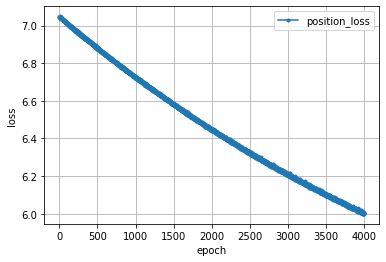

In [9]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()